In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

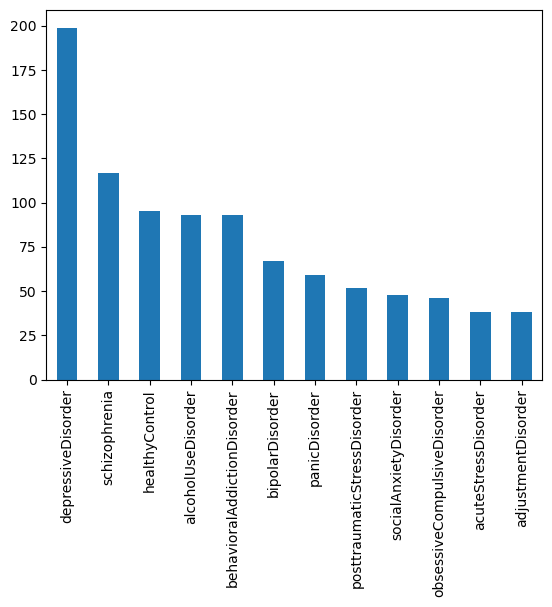

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

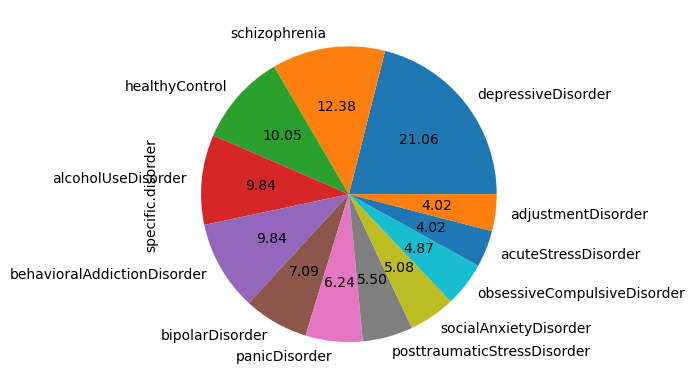

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [13]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [14]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.11,
                           depth=2)

In [15]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4465980	total: 178ms	remaining: 14m 48s
1:	learn: 2.4161364	total: 258ms	remaining: 10m 44s
2:	learn: 2.3957103	total: 344ms	remaining: 9m 33s
3:	learn: 2.3798079	total: 432ms	remaining: 8m 59s
4:	learn: 2.3636351	total: 513ms	remaining: 8m 32s
5:	learn: 2.3497843	total: 595ms	remaining: 8m 14s
6:	learn: 2.3376635	total: 683ms	remaining: 8m 7s
7:	learn: 2.3284157	total: 769ms	remaining: 8m
8:	learn: 2.3182079	total: 861ms	remaining: 7m 57s
9:	learn: 2.3108658	total: 943ms	remaining: 7m 50s
10:	learn: 2.3048810	total: 1.03s	remaining: 7m 46s
11:	learn: 2.2960591	total: 1.11s	remaining: 7m 42s
12:	learn: 2.2883216	total: 1.2s	remaining: 7m 41s
13:	learn: 2.2828794	total: 1.29s	remaining: 7m 39s
14:	learn: 2.2766052	total: 1.37s	remaining: 7m 35s
15:	learn: 2.2719830	total: 1.46s	remaining: 7m 34s
16:	learn: 2.2657410	total: 1.55s	remaining: 7m 34s
17:	learn: 2.2566647	total: 1.63s	remaining: 7m 31s
18:	learn: 2.2508690	total: 1.72s	remaining: 7m 29s
19:	learn: 2.2400279	total

159:	learn: 1.7273937	total: 13.4s	remaining: 6m 46s
160:	learn: 1.7263486	total: 13.5s	remaining: 6m 46s
161:	learn: 1.7258978	total: 13.6s	remaining: 6m 46s
162:	learn: 1.7235623	total: 13.7s	remaining: 6m 45s
163:	learn: 1.7228405	total: 13.8s	remaining: 6m 45s
164:	learn: 1.7204731	total: 13.8s	remaining: 6m 45s
165:	learn: 1.7170650	total: 13.9s	remaining: 6m 45s
166:	learn: 1.7163716	total: 14s	remaining: 6m 45s
167:	learn: 1.7142380	total: 14.1s	remaining: 6m 44s
168:	learn: 1.7129476	total: 14.2s	remaining: 6m 44s
169:	learn: 1.7086904	total: 14.2s	remaining: 6m 44s
170:	learn: 1.7079612	total: 14.3s	remaining: 6m 44s
171:	learn: 1.7071723	total: 14.4s	remaining: 6m 44s
172:	learn: 1.7044430	total: 14.5s	remaining: 6m 44s
173:	learn: 1.7010684	total: 14.6s	remaining: 6m 43s
174:	learn: 1.6991219	total: 14.6s	remaining: 6m 43s
175:	learn: 1.6968985	total: 14.7s	remaining: 6m 43s
176:	learn: 1.6918554	total: 14.8s	remaining: 6m 43s
177:	learn: 1.6889146	total: 14.9s	remaining: 6m

315:	learn: 1.4202985	total: 26.5s	remaining: 6m 33s
316:	learn: 1.4200387	total: 26.6s	remaining: 6m 32s
317:	learn: 1.4190030	total: 26.7s	remaining: 6m 32s
318:	learn: 1.4183408	total: 26.8s	remaining: 6m 32s
319:	learn: 1.4164399	total: 26.8s	remaining: 6m 32s
320:	learn: 1.4150351	total: 26.9s	remaining: 6m 32s
321:	learn: 1.4125042	total: 27s	remaining: 6m 32s
322:	learn: 1.4093312	total: 27.1s	remaining: 6m 32s
323:	learn: 1.4075509	total: 27.2s	remaining: 6m 31s
324:	learn: 1.4048470	total: 27.2s	remaining: 6m 31s
325:	learn: 1.4033182	total: 27.3s	remaining: 6m 31s
326:	learn: 1.4028049	total: 27.4s	remaining: 6m 31s
327:	learn: 1.4011018	total: 27.5s	remaining: 6m 31s
328:	learn: 1.4000841	total: 27.6s	remaining: 6m 31s
329:	learn: 1.3982234	total: 27.6s	remaining: 6m 31s
330:	learn: 1.3968063	total: 27.7s	remaining: 6m 31s
331:	learn: 1.3951544	total: 27.8s	remaining: 6m 30s
332:	learn: 1.3926186	total: 27.9s	remaining: 6m 30s
333:	learn: 1.3903664	total: 28s	remaining: 6m 3

471:	learn: 1.1896665	total: 39.3s	remaining: 6m 17s
472:	learn: 1.1876260	total: 39.4s	remaining: 6m 17s
473:	learn: 1.1867668	total: 39.5s	remaining: 6m 16s
474:	learn: 1.1859808	total: 39.6s	remaining: 6m 16s
475:	learn: 1.1852294	total: 39.6s	remaining: 6m 16s
476:	learn: 1.1845809	total: 39.7s	remaining: 6m 16s
477:	learn: 1.1833758	total: 39.8s	remaining: 6m 16s
478:	learn: 1.1828428	total: 39.9s	remaining: 6m 16s
479:	learn: 1.1809591	total: 40s	remaining: 6m 16s
480:	learn: 1.1798986	total: 40.1s	remaining: 6m 16s
481:	learn: 1.1792610	total: 40.2s	remaining: 6m 16s
482:	learn: 1.1772369	total: 40.2s	remaining: 6m 16s
483:	learn: 1.1767202	total: 40.3s	remaining: 6m 16s
484:	learn: 1.1750259	total: 40.4s	remaining: 6m 16s
485:	learn: 1.1733857	total: 40.5s	remaining: 6m 16s
486:	learn: 1.1721353	total: 40.6s	remaining: 6m 15s
487:	learn: 1.1717268	total: 40.6s	remaining: 6m 15s
488:	learn: 1.1704772	total: 40.7s	remaining: 6m 15s
489:	learn: 1.1691112	total: 40.8s	remaining: 6m

630:	learn: 1.0176878	total: 52.8s	remaining: 6m 5s
631:	learn: 1.0172427	total: 52.9s	remaining: 6m 5s
632:	learn: 1.0161878	total: 52.9s	remaining: 6m 5s
633:	learn: 1.0158106	total: 53s	remaining: 6m 5s
634:	learn: 1.0143143	total: 53.1s	remaining: 6m 5s
635:	learn: 1.0139512	total: 53.2s	remaining: 6m 5s
636:	learn: 1.0131751	total: 53.3s	remaining: 6m 4s
637:	learn: 1.0129100	total: 53.4s	remaining: 6m 4s
638:	learn: 1.0121038	total: 53.4s	remaining: 6m 4s
639:	learn: 1.0115325	total: 53.5s	remaining: 6m 4s
640:	learn: 1.0089565	total: 53.6s	remaining: 6m 4s
641:	learn: 1.0075673	total: 53.7s	remaining: 6m 4s
642:	learn: 1.0070363	total: 53.8s	remaining: 6m 4s
643:	learn: 1.0066416	total: 53.9s	remaining: 6m 4s
644:	learn: 1.0058001	total: 53.9s	remaining: 6m 4s
645:	learn: 1.0041565	total: 54s	remaining: 6m 4s
646:	learn: 1.0036337	total: 54.1s	remaining: 6m 3s
647:	learn: 1.0023661	total: 54.2s	remaining: 6m 3s
648:	learn: 1.0017483	total: 54.3s	remaining: 6m 3s
649:	learn: 0.99

788:	learn: 0.8718862	total: 1m 5s	remaining: 5m 51s
789:	learn: 0.8716251	total: 1m 5s	remaining: 5m 51s
790:	learn: 0.8709134	total: 1m 6s	remaining: 5m 51s
791:	learn: 0.8690021	total: 1m 6s	remaining: 5m 51s
792:	learn: 0.8686643	total: 1m 6s	remaining: 5m 51s
793:	learn: 0.8679123	total: 1m 6s	remaining: 5m 51s
794:	learn: 0.8675975	total: 1m 6s	remaining: 5m 50s
795:	learn: 0.8665894	total: 1m 6s	remaining: 5m 50s
796:	learn: 0.8664775	total: 1m 6s	remaining: 5m 50s
797:	learn: 0.8659903	total: 1m 6s	remaining: 5m 50s
798:	learn: 0.8658313	total: 1m 6s	remaining: 5m 50s
799:	learn: 0.8650579	total: 1m 6s	remaining: 5m 50s
800:	learn: 0.8626300	total: 1m 6s	remaining: 5m 50s
801:	learn: 0.8616256	total: 1m 6s	remaining: 5m 50s
802:	learn: 0.8607355	total: 1m 6s	remaining: 5m 50s
803:	learn: 0.8604897	total: 1m 7s	remaining: 5m 50s
804:	learn: 0.8582569	total: 1m 7s	remaining: 5m 49s
805:	learn: 0.8576371	total: 1m 7s	remaining: 5m 49s
806:	learn: 0.8563990	total: 1m 7s	remaining: 

941:	learn: 0.7632207	total: 1m 18s	remaining: 5m 37s
942:	learn: 0.7629062	total: 1m 18s	remaining: 5m 37s
943:	learn: 0.7625997	total: 1m 18s	remaining: 5m 37s
944:	learn: 0.7620320	total: 1m 18s	remaining: 5m 37s
945:	learn: 0.7613168	total: 1m 18s	remaining: 5m 37s
946:	learn: 0.7608668	total: 1m 18s	remaining: 5m 37s
947:	learn: 0.7606697	total: 1m 18s	remaining: 5m 37s
948:	learn: 0.7603947	total: 1m 18s	remaining: 5m 37s
949:	learn: 0.7590760	total: 1m 19s	remaining: 5m 36s
950:	learn: 0.7588053	total: 1m 19s	remaining: 5m 36s
951:	learn: 0.7579169	total: 1m 19s	remaining: 5m 36s
952:	learn: 0.7561757	total: 1m 19s	remaining: 5m 36s
953:	learn: 0.7553900	total: 1m 19s	remaining: 5m 36s
954:	learn: 0.7551968	total: 1m 19s	remaining: 5m 36s
955:	learn: 0.7540925	total: 1m 19s	remaining: 5m 36s
956:	learn: 0.7538703	total: 1m 19s	remaining: 5m 36s
957:	learn: 0.7534718	total: 1m 19s	remaining: 5m 36s
958:	learn: 0.7527276	total: 1m 19s	remaining: 5m 36s
959:	learn: 0.7520729	total:

1094:	learn: 0.6674512	total: 1m 31s	remaining: 5m 24s
1095:	learn: 0.6667823	total: 1m 31s	remaining: 5m 24s
1096:	learn: 0.6659411	total: 1m 31s	remaining: 5m 24s
1097:	learn: 0.6652956	total: 1m 31s	remaining: 5m 24s
1098:	learn: 0.6651733	total: 1m 31s	remaining: 5m 24s
1099:	learn: 0.6642131	total: 1m 31s	remaining: 5m 24s
1100:	learn: 0.6640537	total: 1m 31s	remaining: 5m 24s
1101:	learn: 0.6631863	total: 1m 31s	remaining: 5m 24s
1102:	learn: 0.6630548	total: 1m 31s	remaining: 5m 24s
1103:	learn: 0.6624951	total: 1m 31s	remaining: 5m 24s
1104:	learn: 0.6624324	total: 1m 31s	remaining: 5m 23s
1105:	learn: 0.6619871	total: 1m 31s	remaining: 5m 23s
1106:	learn: 0.6612212	total: 1m 32s	remaining: 5m 23s
1107:	learn: 0.6611253	total: 1m 32s	remaining: 5m 23s
1108:	learn: 0.6603642	total: 1m 32s	remaining: 5m 23s
1109:	learn: 0.6601561	total: 1m 32s	remaining: 5m 23s
1110:	learn: 0.6591909	total: 1m 32s	remaining: 5m 23s
1111:	learn: 0.6584446	total: 1m 32s	remaining: 5m 23s
1112:	lear

1244:	learn: 0.5855128	total: 1m 43s	remaining: 5m 12s
1245:	learn: 0.5849386	total: 1m 43s	remaining: 5m 12s
1246:	learn: 0.5843207	total: 1m 43s	remaining: 5m 12s
1247:	learn: 0.5837778	total: 1m 43s	remaining: 5m 12s
1248:	learn: 0.5829701	total: 1m 43s	remaining: 5m 11s
1249:	learn: 0.5820101	total: 1m 43s	remaining: 5m 11s
1250:	learn: 0.5813995	total: 1m 44s	remaining: 5m 11s
1251:	learn: 0.5807022	total: 1m 44s	remaining: 5m 11s
1252:	learn: 0.5786059	total: 1m 44s	remaining: 5m 11s
1253:	learn: 0.5783517	total: 1m 44s	remaining: 5m 11s
1254:	learn: 0.5782457	total: 1m 44s	remaining: 5m 11s
1255:	learn: 0.5781276	total: 1m 44s	remaining: 5m 11s
1256:	learn: 0.5780449	total: 1m 44s	remaining: 5m 11s
1257:	learn: 0.5775017	total: 1m 44s	remaining: 5m 11s
1258:	learn: 0.5773640	total: 1m 44s	remaining: 5m 11s
1259:	learn: 0.5767309	total: 1m 44s	remaining: 5m 11s
1260:	learn: 0.5766233	total: 1m 44s	remaining: 5m 10s
1261:	learn: 0.5759948	total: 1m 44s	remaining: 5m 10s
1262:	lear

1397:	learn: 0.5093966	total: 1m 56s	remaining: 4m 59s
1398:	learn: 0.5085298	total: 1m 56s	remaining: 4m 59s
1399:	learn: 0.5081500	total: 1m 56s	remaining: 4m 59s
1400:	learn: 0.5073586	total: 1m 56s	remaining: 4m 59s
1401:	learn: 0.5072110	total: 1m 56s	remaining: 4m 58s
1402:	learn: 0.5071145	total: 1m 56s	remaining: 4m 58s
1403:	learn: 0.5061280	total: 1m 56s	remaining: 4m 58s
1404:	learn: 0.5057899	total: 1m 56s	remaining: 4m 58s
1405:	learn: 0.5052258	total: 1m 56s	remaining: 4m 58s
1406:	learn: 0.5048565	total: 1m 56s	remaining: 4m 58s
1407:	learn: 0.5047808	total: 1m 56s	remaining: 4m 58s
1408:	learn: 0.5043367	total: 1m 57s	remaining: 4m 58s
1409:	learn: 0.5041335	total: 1m 57s	remaining: 4m 58s
1410:	learn: 0.5040737	total: 1m 57s	remaining: 4m 58s
1411:	learn: 0.5035073	total: 1m 57s	remaining: 4m 58s
1412:	learn: 0.5029367	total: 1m 57s	remaining: 4m 57s
1413:	learn: 0.5022119	total: 1m 57s	remaining: 4m 57s
1414:	learn: 0.5016780	total: 1m 57s	remaining: 4m 57s
1415:	lear

1549:	learn: 0.4487741	total: 2m 9s	remaining: 4m 47s
1550:	learn: 0.4486086	total: 2m 9s	remaining: 4m 47s
1551:	learn: 0.4482823	total: 2m 9s	remaining: 4m 47s
1552:	learn: 0.4477947	total: 2m 9s	remaining: 4m 47s
1553:	learn: 0.4475179	total: 2m 9s	remaining: 4m 47s
1554:	learn: 0.4473856	total: 2m 10s	remaining: 4m 48s
1555:	learn: 0.4470140	total: 2m 10s	remaining: 4m 48s
1556:	learn: 0.4468907	total: 2m 10s	remaining: 4m 48s
1557:	learn: 0.4462641	total: 2m 10s	remaining: 4m 48s
1558:	learn: 0.4459967	total: 2m 10s	remaining: 4m 48s
1559:	learn: 0.4456916	total: 2m 11s	remaining: 4m 49s
1560:	learn: 0.4452489	total: 2m 11s	remaining: 4m 49s
1561:	learn: 0.4452137	total: 2m 11s	remaining: 4m 49s
1562:	learn: 0.4448963	total: 2m 11s	remaining: 4m 49s
1563:	learn: 0.4447921	total: 2m 11s	remaining: 4m 49s
1564:	learn: 0.4447598	total: 2m 12s	remaining: 4m 50s
1565:	learn: 0.4445575	total: 2m 12s	remaining: 4m 50s
1566:	learn: 0.4442066	total: 2m 12s	remaining: 4m 50s
1567:	learn: 0.

1700:	learn: 0.3996098	total: 2m 25s	remaining: 4m 42s
1701:	learn: 0.3992109	total: 2m 25s	remaining: 4m 42s
1702:	learn: 0.3986811	total: 2m 25s	remaining: 4m 41s
1703:	learn: 0.3986064	total: 2m 25s	remaining: 4m 41s
1704:	learn: 0.3985374	total: 2m 25s	remaining: 4m 41s
1705:	learn: 0.3984848	total: 2m 25s	remaining: 4m 41s
1706:	learn: 0.3979677	total: 2m 25s	remaining: 4m 41s
1707:	learn: 0.3975814	total: 2m 26s	remaining: 4m 41s
1708:	learn: 0.3971787	total: 2m 26s	remaining: 4m 41s
1709:	learn: 0.3970543	total: 2m 26s	remaining: 4m 41s
1710:	learn: 0.3970069	total: 2m 26s	remaining: 4m 41s
1711:	learn: 0.3966463	total: 2m 26s	remaining: 4m 41s
1712:	learn: 0.3958277	total: 2m 26s	remaining: 4m 41s
1713:	learn: 0.3957918	total: 2m 26s	remaining: 4m 40s
1714:	learn: 0.3954188	total: 2m 26s	remaining: 4m 40s
1715:	learn: 0.3953641	total: 2m 26s	remaining: 4m 40s
1716:	learn: 0.3950638	total: 2m 26s	remaining: 4m 40s
1717:	learn: 0.3948081	total: 2m 26s	remaining: 4m 40s
1718:	lear

1850:	learn: 0.3602600	total: 2m 37s	remaining: 4m 28s
1851:	learn: 0.3599134	total: 2m 37s	remaining: 4m 28s
1852:	learn: 0.3596854	total: 2m 37s	remaining: 4m 28s
1853:	learn: 0.3596287	total: 2m 38s	remaining: 4m 28s
1854:	learn: 0.3595434	total: 2m 38s	remaining: 4m 28s
1855:	learn: 0.3593561	total: 2m 38s	remaining: 4m 27s
1856:	learn: 0.3590645	total: 2m 38s	remaining: 4m 27s
1857:	learn: 0.3589767	total: 2m 38s	remaining: 4m 27s
1858:	learn: 0.3585809	total: 2m 38s	remaining: 4m 27s
1859:	learn: 0.3583435	total: 2m 38s	remaining: 4m 27s
1860:	learn: 0.3580064	total: 2m 38s	remaining: 4m 27s
1861:	learn: 0.3579545	total: 2m 38s	remaining: 4m 27s
1862:	learn: 0.3578628	total: 2m 38s	remaining: 4m 27s
1863:	learn: 0.3577637	total: 2m 38s	remaining: 4m 27s
1864:	learn: 0.3574897	total: 2m 38s	remaining: 4m 27s
1865:	learn: 0.3574098	total: 2m 39s	remaining: 4m 27s
1866:	learn: 0.3573146	total: 2m 39s	remaining: 4m 26s
1867:	learn: 0.3566379	total: 2m 39s	remaining: 4m 26s
1868:	lear

2001:	learn: 0.3202088	total: 2m 54s	remaining: 4m 21s
2002:	learn: 0.3199940	total: 2m 54s	remaining: 4m 21s
2003:	learn: 0.3194378	total: 2m 54s	remaining: 4m 21s
2004:	learn: 0.3190953	total: 2m 54s	remaining: 4m 20s
2005:	learn: 0.3186508	total: 2m 54s	remaining: 4m 20s
2006:	learn: 0.3182027	total: 2m 54s	remaining: 4m 20s
2007:	learn: 0.3178838	total: 2m 54s	remaining: 4m 20s
2008:	learn: 0.3176328	total: 2m 55s	remaining: 4m 20s
2009:	learn: 0.3170137	total: 2m 55s	remaining: 4m 20s
2010:	learn: 0.3169704	total: 2m 55s	remaining: 4m 20s
2011:	learn: 0.3164766	total: 2m 55s	remaining: 4m 20s
2012:	learn: 0.3160502	total: 2m 55s	remaining: 4m 20s
2013:	learn: 0.3159947	total: 2m 55s	remaining: 4m 20s
2014:	learn: 0.3155881	total: 2m 55s	remaining: 4m 20s
2015:	learn: 0.3152639	total: 2m 55s	remaining: 4m 19s
2016:	learn: 0.3151109	total: 2m 55s	remaining: 4m 19s
2017:	learn: 0.3145867	total: 2m 55s	remaining: 4m 19s
2018:	learn: 0.3145399	total: 2m 55s	remaining: 4m 19s
2019:	lear

2154:	learn: 0.2846384	total: 3m 6s	remaining: 4m 6s
2155:	learn: 0.2846068	total: 3m 7s	remaining: 4m 6s
2156:	learn: 0.2844079	total: 3m 7s	remaining: 4m 6s
2157:	learn: 0.2843470	total: 3m 7s	remaining: 4m 6s
2158:	learn: 0.2840685	total: 3m 7s	remaining: 4m 6s
2159:	learn: 0.2839750	total: 3m 7s	remaining: 4m 6s
2160:	learn: 0.2839419	total: 3m 7s	remaining: 4m 6s
2161:	learn: 0.2838348	total: 3m 7s	remaining: 4m 6s
2162:	learn: 0.2837805	total: 3m 7s	remaining: 4m 6s
2163:	learn: 0.2835502	total: 3m 7s	remaining: 4m 5s
2164:	learn: 0.2832724	total: 3m 7s	remaining: 4m 5s
2165:	learn: 0.2828951	total: 3m 7s	remaining: 4m 5s
2166:	learn: 0.2828463	total: 3m 7s	remaining: 4m 5s
2167:	learn: 0.2827606	total: 3m 8s	remaining: 4m 5s
2168:	learn: 0.2827289	total: 3m 8s	remaining: 4m 5s
2169:	learn: 0.2826028	total: 3m 8s	remaining: 4m 5s
2170:	learn: 0.2823197	total: 3m 8s	remaining: 4m 5s
2171:	learn: 0.2822390	total: 3m 8s	remaining: 4m 5s
2172:	learn: 0.2821912	total: 3m 8s	remaining:

2310:	learn: 0.2565422	total: 3m 24s	remaining: 3m 57s
2311:	learn: 0.2562561	total: 3m 24s	remaining: 3m 57s
2312:	learn: 0.2562008	total: 3m 24s	remaining: 3m 57s
2313:	learn: 0.2561792	total: 3m 24s	remaining: 3m 57s
2314:	learn: 0.2559248	total: 3m 24s	remaining: 3m 57s
2315:	learn: 0.2555841	total: 3m 24s	remaining: 3m 57s
2316:	learn: 0.2555125	total: 3m 24s	remaining: 3m 57s
2317:	learn: 0.2554243	total: 3m 24s	remaining: 3m 56s
2318:	learn: 0.2552018	total: 3m 24s	remaining: 3m 56s
2319:	learn: 0.2550974	total: 3m 24s	remaining: 3m 56s
2320:	learn: 0.2548675	total: 3m 25s	remaining: 3m 56s
2321:	learn: 0.2548297	total: 3m 25s	remaining: 3m 56s
2322:	learn: 0.2546357	total: 3m 25s	remaining: 3m 56s
2323:	learn: 0.2543758	total: 3m 25s	remaining: 3m 56s
2324:	learn: 0.2543127	total: 3m 25s	remaining: 3m 56s
2325:	learn: 0.2540557	total: 3m 25s	remaining: 3m 56s
2326:	learn: 0.2535111	total: 3m 25s	remaining: 3m 56s
2327:	learn: 0.2534342	total: 3m 25s	remaining: 3m 56s
2328:	lear

2459:	learn: 0.2314555	total: 3m 36s	remaining: 3m 43s
2460:	learn: 0.2311845	total: 3m 36s	remaining: 3m 43s
2461:	learn: 0.2310154	total: 3m 36s	remaining: 3m 43s
2462:	learn: 0.2308897	total: 3m 36s	remaining: 3m 43s
2463:	learn: 0.2308502	total: 3m 36s	remaining: 3m 43s
2464:	learn: 0.2307574	total: 3m 36s	remaining: 3m 43s
2465:	learn: 0.2306171	total: 3m 36s	remaining: 3m 42s
2466:	learn: 0.2304447	total: 3m 37s	remaining: 3m 42s
2467:	learn: 0.2301247	total: 3m 37s	remaining: 3m 42s
2468:	learn: 0.2297686	total: 3m 37s	remaining: 3m 42s
2469:	learn: 0.2295396	total: 3m 37s	remaining: 3m 42s
2470:	learn: 0.2292611	total: 3m 37s	remaining: 3m 42s
2471:	learn: 0.2292277	total: 3m 37s	remaining: 3m 42s
2472:	learn: 0.2290672	total: 3m 37s	remaining: 3m 42s
2473:	learn: 0.2290081	total: 3m 37s	remaining: 3m 42s
2474:	learn: 0.2289821	total: 3m 37s	remaining: 3m 42s
2475:	learn: 0.2288235	total: 3m 37s	remaining: 3m 41s
2476:	learn: 0.2286217	total: 3m 37s	remaining: 3m 41s
2477:	lear

2609:	learn: 0.2101997	total: 3m 53s	remaining: 3m 33s
2610:	learn: 0.2099589	total: 3m 53s	remaining: 3m 33s
2611:	learn: 0.2098497	total: 3m 53s	remaining: 3m 33s
2612:	learn: 0.2096461	total: 3m 53s	remaining: 3m 33s
2613:	learn: 0.2093997	total: 3m 53s	remaining: 3m 33s
2614:	learn: 0.2092021	total: 3m 53s	remaining: 3m 32s
2615:	learn: 0.2089643	total: 3m 53s	remaining: 3m 32s
2616:	learn: 0.2086068	total: 3m 53s	remaining: 3m 32s
2617:	learn: 0.2085430	total: 3m 53s	remaining: 3m 32s
2618:	learn: 0.2081096	total: 3m 53s	remaining: 3m 32s
2619:	learn: 0.2078546	total: 3m 53s	remaining: 3m 32s
2620:	learn: 0.2074409	total: 3m 53s	remaining: 3m 32s
2621:	learn: 0.2072162	total: 3m 54s	remaining: 3m 32s
2622:	learn: 0.2070713	total: 3m 54s	remaining: 3m 32s
2623:	learn: 0.2070276	total: 3m 54s	remaining: 3m 32s
2624:	learn: 0.2069939	total: 3m 54s	remaining: 3m 31s
2625:	learn: 0.2069091	total: 3m 54s	remaining: 3m 31s
2626:	learn: 0.2068839	total: 3m 54s	remaining: 3m 31s
2627:	lear

2762:	learn: 0.1904242	total: 4m 5s	remaining: 3m 18s
2763:	learn: 0.1901804	total: 4m 5s	remaining: 3m 18s
2764:	learn: 0.1901376	total: 4m 5s	remaining: 3m 18s
2765:	learn: 0.1901225	total: 4m 5s	remaining: 3m 18s
2766:	learn: 0.1901019	total: 4m 6s	remaining: 3m 18s
2767:	learn: 0.1899493	total: 4m 6s	remaining: 3m 18s
2768:	learn: 0.1898916	total: 4m 6s	remaining: 3m 18s
2769:	learn: 0.1897553	total: 4m 6s	remaining: 3m 18s
2770:	learn: 0.1897384	total: 4m 6s	remaining: 3m 18s
2771:	learn: 0.1895491	total: 4m 6s	remaining: 3m 18s
2772:	learn: 0.1895210	total: 4m 6s	remaining: 3m 17s
2773:	learn: 0.1894895	total: 4m 6s	remaining: 3m 17s
2774:	learn: 0.1893699	total: 4m 6s	remaining: 3m 17s
2775:	learn: 0.1893595	total: 4m 6s	remaining: 3m 17s
2776:	learn: 0.1892458	total: 4m 6s	remaining: 3m 17s
2777:	learn: 0.1890827	total: 4m 6s	remaining: 3m 17s
2778:	learn: 0.1890757	total: 4m 6s	remaining: 3m 17s
2779:	learn: 0.1889643	total: 4m 7s	remaining: 3m 17s
2780:	learn: 0.1889256	total

2913:	learn: 0.1746651	total: 4m 22s	remaining: 3m 7s
2914:	learn: 0.1744038	total: 4m 22s	remaining: 3m 7s
2915:	learn: 0.1743907	total: 4m 22s	remaining: 3m 7s
2916:	learn: 0.1743695	total: 4m 22s	remaining: 3m 7s
2917:	learn: 0.1743518	total: 4m 22s	remaining: 3m 7s
2918:	learn: 0.1743408	total: 4m 22s	remaining: 3m 7s
2919:	learn: 0.1742330	total: 4m 22s	remaining: 3m 7s
2920:	learn: 0.1742187	total: 4m 22s	remaining: 3m 7s
2921:	learn: 0.1741630	total: 4m 23s	remaining: 3m 7s
2922:	learn: 0.1741244	total: 4m 23s	remaining: 3m 6s
2923:	learn: 0.1740208	total: 4m 23s	remaining: 3m 6s
2924:	learn: 0.1738597	total: 4m 23s	remaining: 3m 6s
2925:	learn: 0.1737996	total: 4m 23s	remaining: 3m 6s
2926:	learn: 0.1737852	total: 4m 23s	remaining: 3m 6s
2927:	learn: 0.1737627	total: 4m 23s	remaining: 3m 6s
2928:	learn: 0.1736676	total: 4m 23s	remaining: 3m 6s
2929:	learn: 0.1736402	total: 4m 23s	remaining: 3m 6s
2930:	learn: 0.1735212	total: 4m 23s	remaining: 3m 6s
2931:	learn: 0.1735046	total

3066:	learn: 0.1596804	total: 4m 34s	remaining: 2m 53s
3067:	learn: 0.1594915	total: 4m 34s	remaining: 2m 53s
3068:	learn: 0.1593360	total: 4m 35s	remaining: 2m 53s
3069:	learn: 0.1593294	total: 4m 35s	remaining: 2m 52s
3070:	learn: 0.1592706	total: 4m 35s	remaining: 2m 52s
3071:	learn: 0.1592214	total: 4m 35s	remaining: 2m 52s
3072:	learn: 0.1591316	total: 4m 35s	remaining: 2m 52s
3073:	learn: 0.1590121	total: 4m 35s	remaining: 2m 52s
3074:	learn: 0.1588714	total: 4m 35s	remaining: 2m 52s
3075:	learn: 0.1588253	total: 4m 35s	remaining: 2m 52s
3076:	learn: 0.1587901	total: 4m 35s	remaining: 2m 52s
3077:	learn: 0.1586578	total: 4m 35s	remaining: 2m 52s
3078:	learn: 0.1585008	total: 4m 35s	remaining: 2m 52s
3079:	learn: 0.1584713	total: 4m 35s	remaining: 2m 52s
3080:	learn: 0.1582567	total: 4m 36s	remaining: 2m 51s
3081:	learn: 0.1582325	total: 4m 36s	remaining: 2m 51s
3082:	learn: 0.1581695	total: 4m 36s	remaining: 2m 51s
3083:	learn: 0.1581406	total: 4m 36s	remaining: 2m 51s
3084:	lear

3217:	learn: 0.1486278	total: 4m 51s	remaining: 2m 41s
3218:	learn: 0.1485615	total: 4m 51s	remaining: 2m 41s
3219:	learn: 0.1485322	total: 4m 52s	remaining: 2m 41s
3220:	learn: 0.1485212	total: 4m 52s	remaining: 2m 41s
3221:	learn: 0.1484995	total: 4m 52s	remaining: 2m 41s
3222:	learn: 0.1484190	total: 4m 52s	remaining: 2m 41s
3223:	learn: 0.1483891	total: 4m 52s	remaining: 2m 41s
3224:	learn: 0.1483201	total: 4m 52s	remaining: 2m 40s
3225:	learn: 0.1482336	total: 4m 52s	remaining: 2m 40s
3226:	learn: 0.1481706	total: 4m 52s	remaining: 2m 40s
3227:	learn: 0.1478444	total: 4m 52s	remaining: 2m 40s
3228:	learn: 0.1477703	total: 4m 52s	remaining: 2m 40s
3229:	learn: 0.1477644	total: 4m 52s	remaining: 2m 40s
3230:	learn: 0.1477416	total: 4m 52s	remaining: 2m 40s
3231:	learn: 0.1476337	total: 4m 52s	remaining: 2m 40s
3232:	learn: 0.1476099	total: 4m 53s	remaining: 2m 40s
3233:	learn: 0.1475832	total: 4m 53s	remaining: 2m 40s
3234:	learn: 0.1475479	total: 4m 53s	remaining: 2m 39s
3235:	lear

3370:	learn: 0.1382012	total: 5m 4s	remaining: 2m 27s
3371:	learn: 0.1381925	total: 5m 4s	remaining: 2m 26s
3372:	learn: 0.1381817	total: 5m 4s	remaining: 2m 26s
3373:	learn: 0.1381627	total: 5m 4s	remaining: 2m 26s
3374:	learn: 0.1381133	total: 5m 4s	remaining: 2m 26s
3375:	learn: 0.1380985	total: 5m 4s	remaining: 2m 26s
3376:	learn: 0.1379703	total: 5m 4s	remaining: 2m 26s
3377:	learn: 0.1378373	total: 5m 4s	remaining: 2m 26s
3378:	learn: 0.1378266	total: 5m 4s	remaining: 2m 26s
3379:	learn: 0.1378029	total: 5m 4s	remaining: 2m 26s
3380:	learn: 0.1377225	total: 5m 5s	remaining: 2m 26s
3381:	learn: 0.1376996	total: 5m 5s	remaining: 2m 25s
3382:	learn: 0.1376081	total: 5m 5s	remaining: 2m 25s
3383:	learn: 0.1375900	total: 5m 5s	remaining: 2m 25s
3384:	learn: 0.1375020	total: 5m 5s	remaining: 2m 25s
3385:	learn: 0.1374087	total: 5m 5s	remaining: 2m 25s
3386:	learn: 0.1373330	total: 5m 5s	remaining: 2m 25s
3387:	learn: 0.1372092	total: 5m 5s	remaining: 2m 25s
3388:	learn: 0.1370431	total

3521:	learn: 0.1270844	total: 5m 21s	remaining: 2m 14s
3522:	learn: 0.1270749	total: 5m 21s	remaining: 2m 14s
3523:	learn: 0.1269490	total: 5m 21s	remaining: 2m 14s
3524:	learn: 0.1269118	total: 5m 21s	remaining: 2m 14s
3525:	learn: 0.1268991	total: 5m 21s	remaining: 2m 14s
3526:	learn: 0.1267968	total: 5m 21s	remaining: 2m 14s
3527:	learn: 0.1267878	total: 5m 21s	remaining: 2m 14s
3528:	learn: 0.1267257	total: 5m 21s	remaining: 2m 14s
3529:	learn: 0.1267156	total: 5m 21s	remaining: 2m 13s
3530:	learn: 0.1267040	total: 5m 21s	remaining: 2m 13s
3531:	learn: 0.1266774	total: 5m 21s	remaining: 2m 13s
3532:	learn: 0.1266064	total: 5m 22s	remaining: 2m 13s
3533:	learn: 0.1264418	total: 5m 22s	remaining: 2m 13s
3534:	learn: 0.1263384	total: 5m 22s	remaining: 2m 13s
3535:	learn: 0.1262312	total: 5m 22s	remaining: 2m 13s
3536:	learn: 0.1261431	total: 5m 22s	remaining: 2m 13s
3537:	learn: 0.1259838	total: 5m 22s	remaining: 2m 13s
3538:	learn: 0.1259568	total: 5m 22s	remaining: 2m 13s
3539:	lear

3674:	learn: 0.1174526	total: 5m 33s	remaining: 2m
3675:	learn: 0.1173721	total: 5m 33s	remaining: 2m
3676:	learn: 0.1172612	total: 5m 33s	remaining: 2m
3677:	learn: 0.1171752	total: 5m 33s	remaining: 1m 59s
3678:	learn: 0.1171212	total: 5m 33s	remaining: 1m 59s
3679:	learn: 0.1170775	total: 5m 33s	remaining: 1m 59s
3680:	learn: 0.1170267	total: 5m 33s	remaining: 1m 59s
3681:	learn: 0.1169553	total: 5m 34s	remaining: 1m 59s
3682:	learn: 0.1169141	total: 5m 34s	remaining: 1m 59s
3683:	learn: 0.1166656	total: 5m 34s	remaining: 1m 59s
3684:	learn: 0.1166545	total: 5m 34s	remaining: 1m 59s
3685:	learn: 0.1166114	total: 5m 34s	remaining: 1m 59s
3686:	learn: 0.1165960	total: 5m 34s	remaining: 1m 59s
3687:	learn: 0.1165407	total: 5m 34s	remaining: 1m 58s
3688:	learn: 0.1165138	total: 5m 34s	remaining: 1m 58s
3689:	learn: 0.1164534	total: 5m 34s	remaining: 1m 58s
3690:	learn: 0.1163769	total: 5m 34s	remaining: 1m 58s
3691:	learn: 0.1163660	total: 5m 34s	remaining: 1m 58s
3692:	learn: 0.1163327

3824:	learn: 0.1100210	total: 5m 50s	remaining: 1m 47s
3825:	learn: 0.1098908	total: 5m 50s	remaining: 1m 47s
3826:	learn: 0.1098732	total: 5m 50s	remaining: 1m 47s
3827:	learn: 0.1097717	total: 5m 50s	remaining: 1m 47s
3828:	learn: 0.1096140	total: 5m 50s	remaining: 1m 47s
3829:	learn: 0.1095134	total: 5m 50s	remaining: 1m 47s
3830:	learn: 0.1094245	total: 5m 50s	remaining: 1m 47s
3831:	learn: 0.1093796	total: 5m 50s	remaining: 1m 46s
3832:	learn: 0.1093302	total: 5m 50s	remaining: 1m 46s
3833:	learn: 0.1092417	total: 5m 51s	remaining: 1m 46s
3834:	learn: 0.1091427	total: 5m 51s	remaining: 1m 46s
3835:	learn: 0.1090317	total: 5m 51s	remaining: 1m 46s
3836:	learn: 0.1089462	total: 5m 51s	remaining: 1m 46s
3837:	learn: 0.1088970	total: 5m 51s	remaining: 1m 46s
3838:	learn: 0.1088292	total: 5m 51s	remaining: 1m 46s
3839:	learn: 0.1087723	total: 5m 51s	remaining: 1m 46s
3840:	learn: 0.1087581	total: 5m 51s	remaining: 1m 46s
3841:	learn: 0.1086716	total: 5m 51s	remaining: 1m 45s
3842:	lear

3977:	learn: 0.1022302	total: 6m 2s	remaining: 1m 33s
3978:	learn: 0.1021846	total: 6m 2s	remaining: 1m 33s
3979:	learn: 0.1021639	total: 6m 2s	remaining: 1m 32s
3980:	learn: 0.1021315	total: 6m 2s	remaining: 1m 32s
3981:	learn: 0.1021194	total: 6m 2s	remaining: 1m 32s
3982:	learn: 0.1020790	total: 6m 3s	remaining: 1m 32s
3983:	learn: 0.1019780	total: 6m 3s	remaining: 1m 32s
3984:	learn: 0.1019565	total: 6m 3s	remaining: 1m 32s
3985:	learn: 0.1019378	total: 6m 3s	remaining: 1m 32s
3986:	learn: 0.1019266	total: 6m 3s	remaining: 1m 32s
3987:	learn: 0.1018115	total: 6m 3s	remaining: 1m 32s
3988:	learn: 0.1018028	total: 6m 3s	remaining: 1m 32s
3989:	learn: 0.1017911	total: 6m 3s	remaining: 1m 32s
3990:	learn: 0.1017319	total: 6m 3s	remaining: 1m 31s
3991:	learn: 0.1016884	total: 6m 3s	remaining: 1m 31s
3992:	learn: 0.1016264	total: 6m 3s	remaining: 1m 31s
3993:	learn: 0.1015559	total: 6m 3s	remaining: 1m 31s
3994:	learn: 0.1014602	total: 6m 4s	remaining: 1m 31s
3995:	learn: 0.1013790	total

4128:	learn: 0.0951426	total: 6m 19s	remaining: 1m 20s
4129:	learn: 0.0950912	total: 6m 19s	remaining: 1m 19s
4130:	learn: 0.0949983	total: 6m 19s	remaining: 1m 19s
4131:	learn: 0.0948842	total: 6m 19s	remaining: 1m 19s
4132:	learn: 0.0947929	total: 6m 19s	remaining: 1m 19s
4133:	learn: 0.0947385	total: 6m 19s	remaining: 1m 19s
4134:	learn: 0.0946999	total: 6m 19s	remaining: 1m 19s
4135:	learn: 0.0946588	total: 6m 20s	remaining: 1m 19s
4136:	learn: 0.0946056	total: 6m 20s	remaining: 1m 19s
4137:	learn: 0.0945513	total: 6m 20s	remaining: 1m 19s
4138:	learn: 0.0944811	total: 6m 20s	remaining: 1m 19s
4139:	learn: 0.0944672	total: 6m 20s	remaining: 1m 19s
4140:	learn: 0.0944059	total: 6m 20s	remaining: 1m 18s
4141:	learn: 0.0943983	total: 6m 20s	remaining: 1m 18s
4142:	learn: 0.0943617	total: 6m 20s	remaining: 1m 18s
4143:	learn: 0.0943494	total: 6m 20s	remaining: 1m 18s
4144:	learn: 0.0942880	total: 6m 20s	remaining: 1m 18s
4145:	learn: 0.0942830	total: 6m 20s	remaining: 1m 18s
4146:	lear

4278:	learn: 0.0895727	total: 6m 31s	remaining: 1m 5s
4279:	learn: 0.0895405	total: 6m 31s	remaining: 1m 5s
4280:	learn: 0.0895366	total: 6m 31s	remaining: 1m 5s
4281:	learn: 0.0895101	total: 6m 31s	remaining: 1m 5s
4282:	learn: 0.0894715	total: 6m 32s	remaining: 1m 5s
4283:	learn: 0.0894296	total: 6m 32s	remaining: 1m 5s
4284:	learn: 0.0894136	total: 6m 32s	remaining: 1m 5s
4285:	learn: 0.0894023	total: 6m 32s	remaining: 1m 5s
4286:	learn: 0.0893805	total: 6m 32s	remaining: 1m 5s
4287:	learn: 0.0893145	total: 6m 32s	remaining: 1m 5s
4288:	learn: 0.0892747	total: 6m 32s	remaining: 1m 5s
4289:	learn: 0.0892661	total: 6m 32s	remaining: 1m 4s
4290:	learn: 0.0892537	total: 6m 32s	remaining: 1m 4s
4291:	learn: 0.0892398	total: 6m 32s	remaining: 1m 4s
4292:	learn: 0.0891955	total: 6m 32s	remaining: 1m 4s
4293:	learn: 0.0891838	total: 6m 32s	remaining: 1m 4s
4294:	learn: 0.0891477	total: 6m 33s	remaining: 1m 4s
4295:	learn: 0.0891117	total: 6m 33s	remaining: 1m 4s
4296:	learn: 0.0890720	total

4432:	learn: 0.0845265	total: 6m 48s	remaining: 52.3s
4433:	learn: 0.0845040	total: 6m 48s	remaining: 52.2s
4434:	learn: 0.0844506	total: 6m 48s	remaining: 52.1s
4435:	learn: 0.0843719	total: 6m 48s	remaining: 52s
4436:	learn: 0.0843284	total: 6m 49s	remaining: 51.9s
4437:	learn: 0.0843049	total: 6m 49s	remaining: 51.8s
4438:	learn: 0.0842521	total: 6m 49s	remaining: 51.7s
4439:	learn: 0.0842446	total: 6m 49s	remaining: 51.6s
4440:	learn: 0.0842045	total: 6m 49s	remaining: 51.5s
4441:	learn: 0.0841667	total: 6m 49s	remaining: 51.4s
4442:	learn: 0.0841610	total: 6m 49s	remaining: 51.3s
4443:	learn: 0.0841262	total: 6m 49s	remaining: 51.2s
4444:	learn: 0.0841180	total: 6m 49s	remaining: 51.1s
4445:	learn: 0.0841095	total: 6m 49s	remaining: 51.1s
4446:	learn: 0.0841002	total: 6m 49s	remaining: 51s
4447:	learn: 0.0840882	total: 6m 49s	remaining: 50.9s
4448:	learn: 0.0840829	total: 6m 49s	remaining: 50.8s
4449:	learn: 0.0840765	total: 6m 50s	remaining: 50.7s
4450:	learn: 0.0839991	total: 6m

4588:	learn: 0.0802421	total: 7m 1s	remaining: 37.7s
4589:	learn: 0.0801820	total: 7m 1s	remaining: 37.7s
4590:	learn: 0.0801392	total: 7m 1s	remaining: 37.6s
4591:	learn: 0.0801094	total: 7m 1s	remaining: 37.5s
4592:	learn: 0.0800901	total: 7m 2s	remaining: 37.4s
4593:	learn: 0.0800335	total: 7m 2s	remaining: 37.3s
4594:	learn: 0.0800234	total: 7m 2s	remaining: 37.2s
4595:	learn: 0.0800173	total: 7m 2s	remaining: 37.2s
4596:	learn: 0.0799677	total: 7m 3s	remaining: 37.1s
4597:	learn: 0.0799623	total: 7m 3s	remaining: 37s
4598:	learn: 0.0799413	total: 7m 3s	remaining: 36.9s
4599:	learn: 0.0798959	total: 7m 3s	remaining: 36.8s
4600:	learn: 0.0798541	total: 7m 3s	remaining: 36.8s
4601:	learn: 0.0798509	total: 7m 4s	remaining: 36.7s
4602:	learn: 0.0798106	total: 7m 4s	remaining: 36.6s
4603:	learn: 0.0797696	total: 7m 4s	remaining: 36.5s
4604:	learn: 0.0797197	total: 7m 4s	remaining: 36.4s
4605:	learn: 0.0796845	total: 7m 4s	remaining: 36.4s
4606:	learn: 0.0796124	total: 7m 5s	remaining: 3

4744:	learn: 0.0753412	total: 7m 19s	remaining: 23.6s
4745:	learn: 0.0752760	total: 7m 19s	remaining: 23.5s
4746:	learn: 0.0752703	total: 7m 19s	remaining: 23.4s
4747:	learn: 0.0752280	total: 7m 19s	remaining: 23.3s
4748:	learn: 0.0752020	total: 7m 19s	remaining: 23.2s
4749:	learn: 0.0751115	total: 7m 19s	remaining: 23.2s
4750:	learn: 0.0750993	total: 7m 19s	remaining: 23.1s
4751:	learn: 0.0750488	total: 7m 20s	remaining: 23s
4752:	learn: 0.0750253	total: 7m 20s	remaining: 22.9s
4753:	learn: 0.0750174	total: 7m 20s	remaining: 22.8s
4754:	learn: 0.0750118	total: 7m 20s	remaining: 22.7s
4755:	learn: 0.0749262	total: 7m 20s	remaining: 22.6s
4756:	learn: 0.0748974	total: 7m 20s	remaining: 22.5s
4757:	learn: 0.0748798	total: 7m 20s	remaining: 22.4s
4758:	learn: 0.0748385	total: 7m 20s	remaining: 22.3s
4759:	learn: 0.0747937	total: 7m 20s	remaining: 22.2s
4760:	learn: 0.0747745	total: 7m 20s	remaining: 22.1s
4761:	learn: 0.0747366	total: 7m 20s	remaining: 22s
4762:	learn: 0.0747184	total: 7m

4897:	learn: 0.0711157	total: 7m 35s	remaining: 9.48s
4898:	learn: 0.0711118	total: 7m 35s	remaining: 9.39s
4899:	learn: 0.0710973	total: 7m 35s	remaining: 9.3s
4900:	learn: 0.0710957	total: 7m 36s	remaining: 9.21s
4901:	learn: 0.0710624	total: 7m 36s	remaining: 9.12s
4902:	learn: 0.0710580	total: 7m 36s	remaining: 9.03s
4903:	learn: 0.0710519	total: 7m 36s	remaining: 8.94s
4904:	learn: 0.0710363	total: 7m 37s	remaining: 8.85s
4905:	learn: 0.0709700	total: 7m 37s	remaining: 8.76s
4906:	learn: 0.0709656	total: 7m 37s	remaining: 8.67s
4907:	learn: 0.0709594	total: 7m 37s	remaining: 8.58s
4908:	learn: 0.0709430	total: 7m 38s	remaining: 8.49s
4909:	learn: 0.0709400	total: 7m 38s	remaining: 8.4s
4910:	learn: 0.0709010	total: 7m 38s	remaining: 8.3s
4911:	learn: 0.0708729	total: 7m 38s	remaining: 8.21s
4912:	learn: 0.0708667	total: 7m 38s	remaining: 8.12s
4913:	learn: 0.0708540	total: 7m 38s	remaining: 8.02s
4914:	learn: 0.0708481	total: 7m 38s	remaining: 7.93s
4915:	learn: 0.0708169	total: 7

In [16]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.2147887323943662

In [17]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[10],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 3],
       [ 6],
       [ 3],
       [ 6],
       [ 6],
       [ 9],
       [ 6],
       [11],
       [ 7],
       [11],
       [ 4],
       [11],
       [ 6],
       [ 7],
       [ 6],
       [ 4],
       [ 3],
       [ 4],
       [11],
       [10],
       [ 6],
       [ 6],
       [10],
       [ 6],
       [ 7],
       [ 8],
       [11],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [ 3],
       [ 4],
       [ 4],
       [ 9],
       [ 3],
       [ 6],
       [ 4],
       [ 4],
       [ 6],
       [11],
       [ 6],
       [11],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [ 6],
       [ 7],
       [ 4],
       [ 7],
       [ 6],
       [ 6],
       [11],
       [ 6],
       [ 3],
       [ 5],
       [ 3],
       [ 1],
       [ 7],
       [ 6],
       [11],
       [ 4],
       [ 4],
       [ 6],
       [ 9],

In [18]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  0,  2,  2,  4,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  2,  0,  6,  3,  0,  0,  0,  2,  0],
       [ 1,  0,  3,  3,  0,  9,  2,  0,  0,  1,  6,  0],
       [ 1,  0,  1, 10,  0, 10,  2,  1,  0,  1,  0,  0],
       [ 1,  0,  1,  5,  2, 13,  3,  0,  0,  2,  0,  1],
       [ 0,  0,  8,  9,  2, 27,  2,  1,  1,  2,  8,  1],
       [ 0,  0,  1,  3,  1,  9,  9,  0,  3,  0,  5,  0],
       [ 0,  0,  1,  1,  1,  1,  3,  1,  1,  0,  3,  0],
       [ 0,  1,  2,  1,  1,  4,  0,  0,  4,  2,  3,  1],
       [ 0,  0,  3,  2,  1,  0,  1,  0,  1,  1,  2,  0],
       [ 0,  0,  0,  5,  0, 17,  5,  0,  2,  1,  3,  1],
       [ 0,  0,  1,  5,  0,  6,  0,  0,  0,  0,  1,  1]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

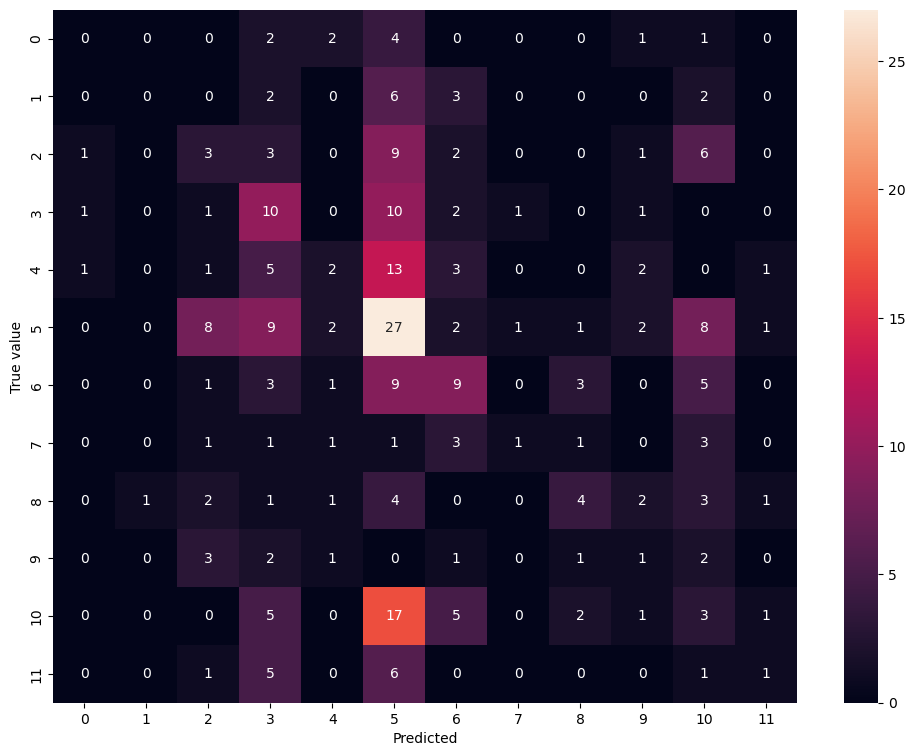

In [19]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,10) with 17 incorrect classifications represents depressive disorders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

In [20]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


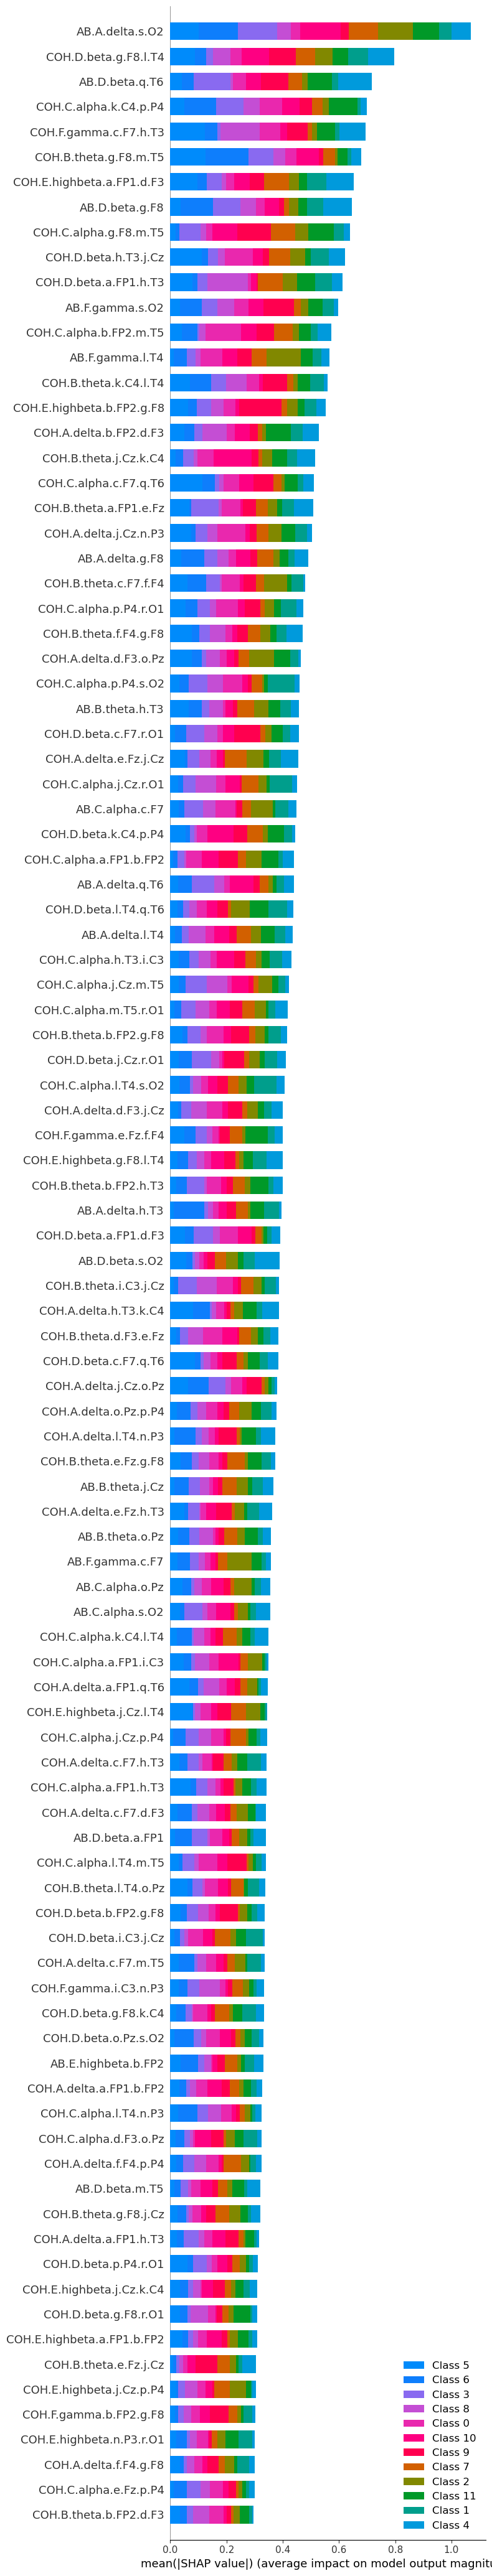

In [24]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [30]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
18,AB.A.delta.s.O2,25.285255
724,COH.D.beta.g.F8.l.T4,18.827613
73,AB.D.beta.q.T6,16.937965
595,COH.C.alpha.k.C4.p.P4,16.540845
1008,COH.F.gamma.c.F7.h.T3,16.458916
...,...,...
828,COH.E.highbeta.b.FP2.o.Pz,0.000000
640,COH.D.beta.a.FP1.o.Pz,0.000000
813,COH.E.highbeta.a.FP1.q.T6,0.000000
1106,COH.F.gamma.k.C4.n.P3,0.000000


In [50]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['AB.A.delta.s.O2',
 'COH.D.beta.g.F8.l.T4',
 'AB.D.beta.q.T6',
 'COH.C.alpha.k.C4.p.P4',
 'COH.F.gamma.c.F7.h.T3',
 'COH.B.theta.g.F8.m.T5',
 'COH.E.highbeta.a.FP1.d.F3',
 'AB.D.beta.g.F8',
 'COH.C.alpha.g.F8.m.T5',
 'COH.D.beta.h.T3.j.Cz']

In [51]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,AB.A.delta.s.O2,COH.D.beta.g.F8.l.T4,AB.D.beta.q.T6,COH.C.alpha.k.C4.p.P4,COH.F.gamma.c.F7.h.T3,COH.B.theta.g.F8.m.T5,COH.E.highbeta.a.FP1.d.F3,AB.D.beta.g.F8,COH.C.alpha.g.F8.m.T5,COH.D.beta.h.T3.j.Cz
0,11.893948,58.746625,10.977550,56.656108,30.407949,3.019519,60.298719,14.294143,6.958765,10.228895
1,12.055957,45.575334,24.480477,67.674074,45.419788,3.104880,65.728780,15.926999,13.219197,22.731369
2,10.161765,45.579548,12.876204,67.674634,80.908038,1.992241,69.566939,8.722198,3.942738,31.004422
3,25.769522,54.882035,27.561668,52.411827,43.757324,9.957550,73.114759,28.274453,29.229350,35.350851
4,12.834485,70.236567,2.648415,78.789694,70.825939,10.139208,70.517063,4.123758,3.629778,32.739772
...,...,...,...,...,...,...,...,...,...,...
940,12.487389,42.339322,21.745380,55.578706,23.793133,39.877159,28.721385,12.051789,4.226975,60.851571
941,14.148625,46.034236,11.121046,38.682872,89.803411,13.660494,76.077511,7.464615,10.127299,59.188127
942,11.993932,49.224857,7.367747,55.519960,26.762732,4.759258,99.123528,5.342358,41.249379,12.818327
943,8.397872,46.650204,7.386604,50.737436,41.115922,3.901587,83.465437,7.527330,36.431704,45.936957


In [52]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [53]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.11,
                           depth=2)

In [54]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4523620	total: 2.69ms	remaining: 13.5s
1:	learn: 2.4210051	total: 4.78ms	remaining: 11.9s
2:	learn: 2.3958128	total: 6.7ms	remaining: 11.2s
3:	learn: 2.3734672	total: 8.56ms	remaining: 10.7s
4:	learn: 2.3571417	total: 10.4ms	remaining: 10.4s
5:	learn: 2.3435683	total: 12.4ms	remaining: 10.3s
6:	learn: 2.3292582	total: 14.3ms	remaining: 10.2s
7:	learn: 2.3172228	total: 16.2ms	remaining: 10.1s
8:	learn: 2.3058632	total: 18.1ms	remaining: 10s
9:	learn: 2.2943005	total: 19.9ms	remaining: 9.95s
10:	learn: 2.2852134	total: 21.8ms	remaining: 9.91s
11:	learn: 2.2772304	total: 23.7ms	remaining: 9.87s
12:	learn: 2.2670820	total: 25.6ms	remaining: 9.82s
13:	learn: 2.2617075	total: 27.5ms	remaining: 9.78s
14:	learn: 2.2521969	total: 29.3ms	remaining: 9.74s
15:	learn: 2.2473488	total: 31.1ms	remaining: 9.69s
16:	learn: 2.2396517	total: 33ms	remaining: 9.66s
17:	learn: 2.2347937	total: 35ms	remaining: 9.68s
18:	learn: 2.2291684	total: 36.8ms	remaining: 9.66s
19:	learn: 2.2233574	total: 3

203:	learn: 1.7772166	total: 387ms	remaining: 9.11s
204:	learn: 1.7761804	total: 390ms	remaining: 9.11s
205:	learn: 1.7748260	total: 392ms	remaining: 9.11s
206:	learn: 1.7726690	total: 394ms	remaining: 9.11s
207:	learn: 1.7689910	total: 395ms	remaining: 9.11s
208:	learn: 1.7680872	total: 397ms	remaining: 9.11s
209:	learn: 1.7654833	total: 399ms	remaining: 9.11s
210:	learn: 1.7636077	total: 401ms	remaining: 9.11s
211:	learn: 1.7630258	total: 403ms	remaining: 9.1s
212:	learn: 1.7623186	total: 405ms	remaining: 9.1s
213:	learn: 1.7609379	total: 407ms	remaining: 9.1s
214:	learn: 1.7591327	total: 409ms	remaining: 9.1s
215:	learn: 1.7575520	total: 411ms	remaining: 9.1s
216:	learn: 1.7565237	total: 413ms	remaining: 9.1s
217:	learn: 1.7561723	total: 415ms	remaining: 9.1s
218:	learn: 1.7543258	total: 417ms	remaining: 9.1s
219:	learn: 1.7539644	total: 419ms	remaining: 9.1s
220:	learn: 1.7522456	total: 421ms	remaining: 9.11s
221:	learn: 1.7513196	total: 423ms	remaining: 9.11s
222:	learn: 1.7492863

404:	learn: 1.5544796	total: 770ms	remaining: 8.73s
405:	learn: 1.5537430	total: 772ms	remaining: 8.73s
406:	learn: 1.5521729	total: 774ms	remaining: 8.73s
407:	learn: 1.5515953	total: 776ms	remaining: 8.73s
408:	learn: 1.5485757	total: 778ms	remaining: 8.73s
409:	learn: 1.5481692	total: 780ms	remaining: 8.73s
410:	learn: 1.5473480	total: 782ms	remaining: 8.73s
411:	learn: 1.5464773	total: 784ms	remaining: 8.72s
412:	learn: 1.5461342	total: 785ms	remaining: 8.72s
413:	learn: 1.5455076	total: 787ms	remaining: 8.72s
414:	learn: 1.5450930	total: 789ms	remaining: 8.72s
415:	learn: 1.5443362	total: 791ms	remaining: 8.72s
416:	learn: 1.5437506	total: 794ms	remaining: 8.72s
417:	learn: 1.5428919	total: 796ms	remaining: 8.72s
418:	learn: 1.5422085	total: 798ms	remaining: 8.72s
419:	learn: 1.5415196	total: 799ms	remaining: 8.72s
420:	learn: 1.5408729	total: 801ms	remaining: 8.71s
421:	learn: 1.5404685	total: 803ms	remaining: 8.71s
422:	learn: 1.5393243	total: 805ms	remaining: 8.71s
423:	learn: 

608:	learn: 1.3830289	total: 1.15s	remaining: 8.32s
609:	learn: 1.3820880	total: 1.16s	remaining: 8.32s
610:	learn: 1.3814622	total: 1.16s	remaining: 8.31s
611:	learn: 1.3813272	total: 1.16s	remaining: 8.31s
612:	learn: 1.3806650	total: 1.16s	remaining: 8.31s
613:	learn: 1.3796662	total: 1.16s	remaining: 8.31s
614:	learn: 1.3788131	total: 1.17s	remaining: 8.31s
615:	learn: 1.3771623	total: 1.17s	remaining: 8.31s
616:	learn: 1.3769296	total: 1.17s	remaining: 8.31s
617:	learn: 1.3765765	total: 1.17s	remaining: 8.3s
618:	learn: 1.3760386	total: 1.17s	remaining: 8.3s
619:	learn: 1.3743904	total: 1.18s	remaining: 8.3s
620:	learn: 1.3740216	total: 1.18s	remaining: 8.3s
621:	learn: 1.3736608	total: 1.18s	remaining: 8.3s
622:	learn: 1.3732502	total: 1.18s	remaining: 8.3s
623:	learn: 1.3724851	total: 1.18s	remaining: 8.29s
624:	learn: 1.3714795	total: 1.18s	remaining: 8.29s
625:	learn: 1.3711114	total: 1.19s	remaining: 8.29s
626:	learn: 1.3705920	total: 1.19s	remaining: 8.29s
627:	learn: 1.3702

811:	learn: 1.2363555	total: 1.54s	remaining: 7.93s
812:	learn: 1.2360254	total: 1.54s	remaining: 7.93s
813:	learn: 1.2357387	total: 1.54s	remaining: 7.92s
814:	learn: 1.2345107	total: 1.54s	remaining: 7.92s
815:	learn: 1.2328576	total: 1.54s	remaining: 7.92s
816:	learn: 1.2320350	total: 1.55s	remaining: 7.92s
817:	learn: 1.2316422	total: 1.55s	remaining: 7.92s
818:	learn: 1.2314538	total: 1.55s	remaining: 7.92s
819:	learn: 1.2310918	total: 1.55s	remaining: 7.91s
820:	learn: 1.2307999	total: 1.55s	remaining: 7.91s
821:	learn: 1.2303779	total: 1.56s	remaining: 7.91s
822:	learn: 1.2295375	total: 1.56s	remaining: 7.91s
823:	learn: 1.2291410	total: 1.56s	remaining: 7.91s
824:	learn: 1.2289182	total: 1.56s	remaining: 7.91s
825:	learn: 1.2285606	total: 1.56s	remaining: 7.9s
826:	learn: 1.2282215	total: 1.56s	remaining: 7.9s
827:	learn: 1.2275680	total: 1.57s	remaining: 7.9s
828:	learn: 1.2270279	total: 1.57s	remaining: 7.9s
829:	learn: 1.2265969	total: 1.57s	remaining: 7.89s
830:	learn: 1.22

1018:	learn: 1.1031876	total: 1.92s	remaining: 7.52s
1019:	learn: 1.1027800	total: 1.93s	remaining: 7.52s
1020:	learn: 1.1024114	total: 1.93s	remaining: 7.51s
1021:	learn: 1.1000580	total: 1.93s	remaining: 7.51s
1022:	learn: 1.0996336	total: 1.93s	remaining: 7.51s
1023:	learn: 1.0991446	total: 1.93s	remaining: 7.51s
1024:	learn: 1.0988021	total: 1.94s	remaining: 7.51s
1025:	learn: 1.0982941	total: 1.94s	remaining: 7.51s
1026:	learn: 1.0979312	total: 1.94s	remaining: 7.5s
1027:	learn: 1.0973571	total: 1.94s	remaining: 7.5s
1028:	learn: 1.0968826	total: 1.94s	remaining: 7.5s
1029:	learn: 1.0964758	total: 1.95s	remaining: 7.5s
1030:	learn: 1.0961167	total: 1.95s	remaining: 7.5s
1031:	learn: 1.0955157	total: 1.95s	remaining: 7.5s
1032:	learn: 1.0949705	total: 1.95s	remaining: 7.5s
1033:	learn: 1.0949139	total: 1.95s	remaining: 7.49s
1034:	learn: 1.0938171	total: 1.96s	remaining: 7.49s
1035:	learn: 1.0930628	total: 1.96s	remaining: 7.49s
1036:	learn: 1.0921343	total: 1.96s	remaining: 7.49s


1220:	learn: 0.9842042	total: 2.31s	remaining: 7.14s
1221:	learn: 0.9839436	total: 2.31s	remaining: 7.14s
1222:	learn: 0.9826681	total: 2.31s	remaining: 7.14s
1223:	learn: 0.9817831	total: 2.31s	remaining: 7.14s
1224:	learn: 0.9813050	total: 2.31s	remaining: 7.14s
1225:	learn: 0.9794599	total: 2.32s	remaining: 7.13s
1226:	learn: 0.9785757	total: 2.32s	remaining: 7.13s
1227:	learn: 0.9784173	total: 2.32s	remaining: 7.13s
1228:	learn: 0.9778361	total: 2.32s	remaining: 7.13s
1229:	learn: 0.9773319	total: 2.33s	remaining: 7.13s
1230:	learn: 0.9768648	total: 2.33s	remaining: 7.13s
1231:	learn: 0.9765731	total: 2.33s	remaining: 7.13s
1232:	learn: 0.9761948	total: 2.33s	remaining: 7.12s
1233:	learn: 0.9753887	total: 2.33s	remaining: 7.12s
1234:	learn: 0.9751411	total: 2.33s	remaining: 7.12s
1235:	learn: 0.9749015	total: 2.34s	remaining: 7.12s
1236:	learn: 0.9743537	total: 2.34s	remaining: 7.12s
1237:	learn: 0.9731393	total: 2.34s	remaining: 7.11s
1238:	learn: 0.9719842	total: 2.34s	remaining:

1427:	learn: 0.8827265	total: 2.69s	remaining: 6.74s
1428:	learn: 0.8823390	total: 2.7s	remaining: 6.74s
1429:	learn: 0.8816281	total: 2.7s	remaining: 6.74s
1430:	learn: 0.8810208	total: 2.7s	remaining: 6.74s
1431:	learn: 0.8808342	total: 2.7s	remaining: 6.74s
1432:	learn: 0.8806387	total: 2.7s	remaining: 6.73s
1433:	learn: 0.8804399	total: 2.71s	remaining: 6.73s
1434:	learn: 0.8802093	total: 2.71s	remaining: 6.73s
1435:	learn: 0.8799932	total: 2.71s	remaining: 6.73s
1436:	learn: 0.8797862	total: 2.71s	remaining: 6.72s
1437:	learn: 0.8793408	total: 2.71s	remaining: 6.72s
1438:	learn: 0.8787240	total: 2.72s	remaining: 6.72s
1439:	learn: 0.8779010	total: 2.72s	remaining: 6.72s
1440:	learn: 0.8769473	total: 2.72s	remaining: 6.72s
1441:	learn: 0.8762062	total: 2.72s	remaining: 6.72s
1442:	learn: 0.8757644	total: 2.72s	remaining: 6.71s
1443:	learn: 0.8750333	total: 2.73s	remaining: 6.71s
1444:	learn: 0.8738691	total: 2.73s	remaining: 6.71s
1445:	learn: 0.8736162	total: 2.73s	remaining: 6.71

1630:	learn: 0.7921487	total: 3.08s	remaining: 6.36s
1631:	learn: 0.7919356	total: 3.08s	remaining: 6.36s
1632:	learn: 0.7917620	total: 3.08s	remaining: 6.36s
1633:	learn: 0.7915278	total: 3.08s	remaining: 6.36s
1634:	learn: 0.7906513	total: 3.09s	remaining: 6.35s
1635:	learn: 0.7903778	total: 3.09s	remaining: 6.35s
1636:	learn: 0.7902658	total: 3.09s	remaining: 6.35s
1637:	learn: 0.7898905	total: 3.09s	remaining: 6.35s
1638:	learn: 0.7892285	total: 3.09s	remaining: 6.35s
1639:	learn: 0.7891372	total: 3.1s	remaining: 6.34s
1640:	learn: 0.7887050	total: 3.1s	remaining: 6.34s
1641:	learn: 0.7885176	total: 3.1s	remaining: 6.34s
1642:	learn: 0.7880226	total: 3.1s	remaining: 6.34s
1643:	learn: 0.7869974	total: 3.1s	remaining: 6.34s
1644:	learn: 0.7866087	total: 3.11s	remaining: 6.34s
1645:	learn: 0.7864474	total: 3.11s	remaining: 6.33s
1646:	learn: 0.7862369	total: 3.11s	remaining: 6.33s
1647:	learn: 0.7858492	total: 3.11s	remaining: 6.33s
1648:	learn: 0.7851310	total: 3.11s	remaining: 6.33

1836:	learn: 0.7151426	total: 3.46s	remaining: 5.97s
1837:	learn: 0.7144191	total: 3.47s	remaining: 5.96s
1838:	learn: 0.7137181	total: 3.47s	remaining: 5.96s
1839:	learn: 0.7133558	total: 3.47s	remaining: 5.96s
1840:	learn: 0.7130459	total: 3.47s	remaining: 5.96s
1841:	learn: 0.7123887	total: 3.47s	remaining: 5.96s
1842:	learn: 0.7121467	total: 3.48s	remaining: 5.96s
1843:	learn: 0.7116917	total: 3.48s	remaining: 5.95s
1844:	learn: 0.7113675	total: 3.48s	remaining: 5.95s
1845:	learn: 0.7110741	total: 3.48s	remaining: 5.95s
1846:	learn: 0.7105474	total: 3.48s	remaining: 5.95s
1847:	learn: 0.7099855	total: 3.49s	remaining: 5.95s
1848:	learn: 0.7097252	total: 3.49s	remaining: 5.95s
1849:	learn: 0.7091778	total: 3.49s	remaining: 5.94s
1850:	learn: 0.7087869	total: 3.49s	remaining: 5.94s
1851:	learn: 0.7080642	total: 3.49s	remaining: 5.94s
1852:	learn: 0.7079518	total: 3.5s	remaining: 5.94s
1853:	learn: 0.7074585	total: 3.5s	remaining: 5.93s
1854:	learn: 0.7072488	total: 3.5s	remaining: 5.

2041:	learn: 0.6469010	total: 3.85s	remaining: 5.58s
2042:	learn: 0.6464252	total: 3.85s	remaining: 5.58s
2043:	learn: 0.6459547	total: 3.85s	remaining: 5.58s
2044:	learn: 0.6452636	total: 3.86s	remaining: 5.57s
2045:	learn: 0.6449568	total: 3.86s	remaining: 5.57s
2046:	learn: 0.6447693	total: 3.86s	remaining: 5.57s
2047:	learn: 0.6446022	total: 3.86s	remaining: 5.57s
2048:	learn: 0.6443189	total: 3.87s	remaining: 5.57s
2049:	learn: 0.6441352	total: 3.87s	remaining: 5.57s
2050:	learn: 0.6437719	total: 3.87s	remaining: 5.56s
2051:	learn: 0.6427202	total: 3.87s	remaining: 5.56s
2052:	learn: 0.6426283	total: 3.87s	remaining: 5.56s
2053:	learn: 0.6425502	total: 3.88s	remaining: 5.56s
2054:	learn: 0.6420053	total: 3.88s	remaining: 5.55s
2055:	learn: 0.6417800	total: 3.88s	remaining: 5.55s
2056:	learn: 0.6415171	total: 3.88s	remaining: 5.55s
2057:	learn: 0.6413873	total: 3.88s	remaining: 5.55s
2058:	learn: 0.6404790	total: 3.88s	remaining: 5.55s
2059:	learn: 0.6396617	total: 3.89s	remaining:

2246:	learn: 0.5840338	total: 4.24s	remaining: 5.19s
2247:	learn: 0.5839168	total: 4.24s	remaining: 5.19s
2248:	learn: 0.5837623	total: 4.24s	remaining: 5.19s
2249:	learn: 0.5833558	total: 4.24s	remaining: 5.18s
2250:	learn: 0.5829592	total: 4.24s	remaining: 5.18s
2251:	learn: 0.5828456	total: 4.25s	remaining: 5.18s
2252:	learn: 0.5827042	total: 4.25s	remaining: 5.18s
2253:	learn: 0.5823891	total: 4.25s	remaining: 5.18s
2254:	learn: 0.5818913	total: 4.25s	remaining: 5.18s
2255:	learn: 0.5816757	total: 4.25s	remaining: 5.17s
2256:	learn: 0.5815695	total: 4.26s	remaining: 5.17s
2257:	learn: 0.5814340	total: 4.26s	remaining: 5.17s
2258:	learn: 0.5813192	total: 4.26s	remaining: 5.17s
2259:	learn: 0.5808199	total: 4.26s	remaining: 5.17s
2260:	learn: 0.5805528	total: 4.26s	remaining: 5.17s
2261:	learn: 0.5804894	total: 4.27s	remaining: 5.16s
2262:	learn: 0.5802948	total: 4.27s	remaining: 5.16s
2263:	learn: 0.5800854	total: 4.27s	remaining: 5.16s
2264:	learn: 0.5795092	total: 4.27s	remaining:

2445:	learn: 0.5305884	total: 4.62s	remaining: 4.83s
2446:	learn: 0.5302824	total: 4.62s	remaining: 4.82s
2447:	learn: 0.5301029	total: 4.63s	remaining: 4.82s
2448:	learn: 0.5297119	total: 4.63s	remaining: 4.82s
2449:	learn: 0.5295116	total: 4.63s	remaining: 4.82s
2450:	learn: 0.5294256	total: 4.63s	remaining: 4.82s
2451:	learn: 0.5292252	total: 4.63s	remaining: 4.82s
2452:	learn: 0.5290260	total: 4.63s	remaining: 4.81s
2453:	learn: 0.5288860	total: 4.64s	remaining: 4.81s
2454:	learn: 0.5286007	total: 4.64s	remaining: 4.81s
2455:	learn: 0.5284916	total: 4.64s	remaining: 4.81s
2456:	learn: 0.5282326	total: 4.64s	remaining: 4.8s
2457:	learn: 0.5278543	total: 4.64s	remaining: 4.8s
2458:	learn: 0.5277216	total: 4.65s	remaining: 4.8s
2459:	learn: 0.5271589	total: 4.65s	remaining: 4.8s
2460:	learn: 0.5270187	total: 4.65s	remaining: 4.8s
2461:	learn: 0.5267107	total: 4.65s	remaining: 4.8s
2462:	learn: 0.5262729	total: 4.66s	remaining: 4.79s
2463:	learn: 0.5261684	total: 4.66s	remaining: 4.79s

2640:	learn: 0.4875192	total: 4.99s	remaining: 4.46s
2641:	learn: 0.4872305	total: 4.99s	remaining: 4.46s
2642:	learn: 0.4871126	total: 5s	remaining: 4.46s
2643:	learn: 0.4868561	total: 5s	remaining: 4.45s
2644:	learn: 0.4867704	total: 5s	remaining: 4.45s
2645:	learn: 0.4866301	total: 5s	remaining: 4.45s
2646:	learn: 0.4865631	total: 5s	remaining: 4.45s
2647:	learn: 0.4864365	total: 5.01s	remaining: 4.45s
2648:	learn: 0.4863005	total: 5.01s	remaining: 4.44s
2649:	learn: 0.4859850	total: 5.01s	remaining: 4.44s
2650:	learn: 0.4857775	total: 5.01s	remaining: 4.44s
2651:	learn: 0.4856561	total: 5.01s	remaining: 4.44s
2652:	learn: 0.4855047	total: 5.02s	remaining: 4.44s
2653:	learn: 0.4854177	total: 5.02s	remaining: 4.43s
2654:	learn: 0.4852782	total: 5.02s	remaining: 4.43s
2655:	learn: 0.4851473	total: 5.02s	remaining: 4.43s
2656:	learn: 0.4846992	total: 5.02s	remaining: 4.43s
2657:	learn: 0.4844044	total: 5.03s	remaining: 4.43s
2658:	learn: 0.4841774	total: 5.03s	remaining: 4.42s
2659:	le

2847:	learn: 0.4474452	total: 5.38s	remaining: 4.06s
2848:	learn: 0.4473516	total: 5.38s	remaining: 4.06s
2849:	learn: 0.4472627	total: 5.38s	remaining: 4.06s
2850:	learn: 0.4469159	total: 5.38s	remaining: 4.06s
2851:	learn: 0.4468334	total: 5.39s	remaining: 4.06s
2852:	learn: 0.4466541	total: 5.39s	remaining: 4.05s
2853:	learn: 0.4464857	total: 5.39s	remaining: 4.05s
2854:	learn: 0.4459937	total: 5.39s	remaining: 4.05s
2855:	learn: 0.4456594	total: 5.39s	remaining: 4.05s
2856:	learn: 0.4455097	total: 5.4s	remaining: 4.05s
2857:	learn: 0.4450912	total: 5.4s	remaining: 4.04s
2858:	learn: 0.4450272	total: 5.4s	remaining: 4.04s
2859:	learn: 0.4447503	total: 5.4s	remaining: 4.04s
2860:	learn: 0.4443504	total: 5.4s	remaining: 4.04s
2861:	learn: 0.4439957	total: 5.41s	remaining: 4.04s
2862:	learn: 0.4438958	total: 5.41s	remaining: 4.04s
2863:	learn: 0.4436897	total: 5.41s	remaining: 4.03s
2864:	learn: 0.4434323	total: 5.41s	remaining: 4.03s
2865:	learn: 0.4432214	total: 5.41s	remaining: 4.03

3053:	learn: 0.4072332	total: 5.76s	remaining: 3.67s
3054:	learn: 0.4068286	total: 5.77s	remaining: 3.67s
3055:	learn: 0.4067203	total: 5.77s	remaining: 3.67s
3056:	learn: 0.4064040	total: 5.77s	remaining: 3.67s
3057:	learn: 0.4063270	total: 5.77s	remaining: 3.67s
3058:	learn: 0.4062176	total: 5.77s	remaining: 3.66s
3059:	learn: 0.4059083	total: 5.78s	remaining: 3.66s
3060:	learn: 0.4056735	total: 5.78s	remaining: 3.66s
3061:	learn: 0.4055580	total: 5.78s	remaining: 3.66s
3062:	learn: 0.4055061	total: 5.78s	remaining: 3.66s
3063:	learn: 0.4053267	total: 5.78s	remaining: 3.65s
3064:	learn: 0.4052139	total: 5.79s	remaining: 3.65s
3065:	learn: 0.4048344	total: 5.79s	remaining: 3.65s
3066:	learn: 0.4047424	total: 5.79s	remaining: 3.65s
3067:	learn: 0.4044929	total: 5.79s	remaining: 3.65s
3068:	learn: 0.4044131	total: 5.79s	remaining: 3.65s
3069:	learn: 0.4042099	total: 5.8s	remaining: 3.64s
3070:	learn: 0.4040262	total: 5.8s	remaining: 3.64s
3071:	learn: 0.4037317	total: 5.8s	remaining: 3.

3255:	learn: 0.3751255	total: 6.15s	remaining: 3.29s
3256:	learn: 0.3750490	total: 6.15s	remaining: 3.29s
3257:	learn: 0.3749589	total: 6.15s	remaining: 3.29s
3258:	learn: 0.3746954	total: 6.16s	remaining: 3.29s
3259:	learn: 0.3745354	total: 6.16s	remaining: 3.29s
3260:	learn: 0.3744829	total: 6.16s	remaining: 3.28s
3261:	learn: 0.3743841	total: 6.16s	remaining: 3.28s
3262:	learn: 0.3741780	total: 6.16s	remaining: 3.28s
3263:	learn: 0.3741074	total: 6.16s	remaining: 3.28s
3264:	learn: 0.3737239	total: 6.17s	remaining: 3.28s
3265:	learn: 0.3734691	total: 6.17s	remaining: 3.27s
3266:	learn: 0.3733835	total: 6.17s	remaining: 3.27s
3267:	learn: 0.3733280	total: 6.17s	remaining: 3.27s
3268:	learn: 0.3731326	total: 6.17s	remaining: 3.27s
3269:	learn: 0.3729261	total: 6.18s	remaining: 3.27s
3270:	learn: 0.3728819	total: 6.18s	remaining: 3.27s
3271:	learn: 0.3727556	total: 6.18s	remaining: 3.26s
3272:	learn: 0.3727011	total: 6.18s	remaining: 3.26s
3273:	learn: 0.3724497	total: 6.18s	remaining:

3459:	learn: 0.3463078	total: 6.54s	remaining: 2.91s
3460:	learn: 0.3461842	total: 6.54s	remaining: 2.91s
3461:	learn: 0.3460541	total: 6.54s	remaining: 2.9s
3462:	learn: 0.3459864	total: 6.54s	remaining: 2.9s
3463:	learn: 0.3458610	total: 6.54s	remaining: 2.9s
3464:	learn: 0.3455627	total: 6.54s	remaining: 2.9s
3465:	learn: 0.3455253	total: 6.55s	remaining: 2.9s
3466:	learn: 0.3452361	total: 6.55s	remaining: 2.9s
3467:	learn: 0.3448907	total: 6.55s	remaining: 2.89s
3468:	learn: 0.3448346	total: 6.55s	remaining: 2.89s
3469:	learn: 0.3446971	total: 6.55s	remaining: 2.89s
3470:	learn: 0.3445544	total: 6.56s	remaining: 2.89s
3471:	learn: 0.3443924	total: 6.56s	remaining: 2.89s
3472:	learn: 0.3442964	total: 6.56s	remaining: 2.88s
3473:	learn: 0.3442289	total: 6.56s	remaining: 2.88s
3474:	learn: 0.3440957	total: 6.56s	remaining: 2.88s
3475:	learn: 0.3437407	total: 6.57s	remaining: 2.88s
3476:	learn: 0.3434803	total: 6.57s	remaining: 2.88s
3477:	learn: 0.3434296	total: 6.57s	remaining: 2.88s

3664:	learn: 0.3191571	total: 6.92s	remaining: 2.52s
3665:	learn: 0.3190543	total: 6.92s	remaining: 2.52s
3666:	learn: 0.3188979	total: 6.92s	remaining: 2.52s
3667:	learn: 0.3187422	total: 6.93s	remaining: 2.52s
3668:	learn: 0.3186314	total: 6.93s	remaining: 2.51s
3669:	learn: 0.3185666	total: 6.93s	remaining: 2.51s
3670:	learn: 0.3185153	total: 6.93s	remaining: 2.51s
3671:	learn: 0.3184555	total: 6.93s	remaining: 2.51s
3672:	learn: 0.3184117	total: 6.94s	remaining: 2.51s
3673:	learn: 0.3183620	total: 6.94s	remaining: 2.5s
3674:	learn: 0.3183022	total: 6.94s	remaining: 2.5s
3675:	learn: 0.3182459	total: 6.94s	remaining: 2.5s
3676:	learn: 0.3180652	total: 6.95s	remaining: 2.5s
3677:	learn: 0.3178534	total: 6.95s	remaining: 2.5s
3678:	learn: 0.3177772	total: 6.95s	remaining: 2.5s
3679:	learn: 0.3176771	total: 6.95s	remaining: 2.49s
3680:	learn: 0.3175383	total: 6.95s	remaining: 2.49s
3681:	learn: 0.3174799	total: 6.96s	remaining: 2.49s
3682:	learn: 0.3173161	total: 6.96s	remaining: 2.49s

3870:	learn: 0.2958991	total: 7.31s	remaining: 2.13s
3871:	learn: 0.2958573	total: 7.31s	remaining: 2.13s
3872:	learn: 0.2958116	total: 7.31s	remaining: 2.13s
3873:	learn: 0.2957301	total: 7.31s	remaining: 2.13s
3874:	learn: 0.2955486	total: 7.32s	remaining: 2.12s
3875:	learn: 0.2955328	total: 7.32s	remaining: 2.12s
3876:	learn: 0.2954385	total: 7.32s	remaining: 2.12s
3877:	learn: 0.2953691	total: 7.32s	remaining: 2.12s
3878:	learn: 0.2951895	total: 7.32s	remaining: 2.12s
3879:	learn: 0.2951079	total: 7.33s	remaining: 2.11s
3880:	learn: 0.2950403	total: 7.33s	remaining: 2.11s
3881:	learn: 0.2949915	total: 7.33s	remaining: 2.11s
3882:	learn: 0.2949233	total: 7.33s	remaining: 2.11s
3883:	learn: 0.2948040	total: 7.33s	remaining: 2.11s
3884:	learn: 0.2946072	total: 7.33s	remaining: 2.1s
3885:	learn: 0.2945445	total: 7.34s	remaining: 2.1s
3886:	learn: 0.2944877	total: 7.34s	remaining: 2.1s
3887:	learn: 0.2943575	total: 7.34s	remaining: 2.1s
3888:	learn: 0.2942434	total: 7.34s	remaining: 2.1

4073:	learn: 0.2738479	total: 7.69s	remaining: 1.75s
4074:	learn: 0.2737719	total: 7.69s	remaining: 1.75s
4075:	learn: 0.2737005	total: 7.7s	remaining: 1.74s
4076:	learn: 0.2735363	total: 7.7s	remaining: 1.74s
4077:	learn: 0.2734471	total: 7.7s	remaining: 1.74s
4078:	learn: 0.2731410	total: 7.7s	remaining: 1.74s
4079:	learn: 0.2731018	total: 7.7s	remaining: 1.74s
4080:	learn: 0.2727966	total: 7.7s	remaining: 1.74s
4081:	learn: 0.2727763	total: 7.71s	remaining: 1.73s
4082:	learn: 0.2726602	total: 7.71s	remaining: 1.73s
4083:	learn: 0.2726004	total: 7.71s	remaining: 1.73s
4084:	learn: 0.2725599	total: 7.71s	remaining: 1.73s
4085:	learn: 0.2725046	total: 7.71s	remaining: 1.73s
4086:	learn: 0.2723892	total: 7.72s	remaining: 1.72s
4087:	learn: 0.2723229	total: 7.72s	remaining: 1.72s
4088:	learn: 0.2722429	total: 7.72s	remaining: 1.72s
4089:	learn: 0.2721849	total: 7.72s	remaining: 1.72s
4090:	learn: 0.2720730	total: 7.72s	remaining: 1.72s
4091:	learn: 0.2718772	total: 7.73s	remaining: 1.71s

4278:	learn: 0.2537708	total: 8.07s	remaining: 1.36s
4279:	learn: 0.2537434	total: 8.08s	remaining: 1.36s
4280:	learn: 0.2537105	total: 8.08s	remaining: 1.36s
4281:	learn: 0.2536666	total: 8.08s	remaining: 1.35s
4282:	learn: 0.2535086	total: 8.08s	remaining: 1.35s
4283:	learn: 0.2533726	total: 8.09s	remaining: 1.35s
4284:	learn: 0.2531827	total: 8.09s	remaining: 1.35s
4285:	learn: 0.2530465	total: 8.09s	remaining: 1.35s
4286:	learn: 0.2530130	total: 8.09s	remaining: 1.34s
4287:	learn: 0.2529885	total: 8.09s	remaining: 1.34s
4288:	learn: 0.2529355	total: 8.1s	remaining: 1.34s
4289:	learn: 0.2528958	total: 8.1s	remaining: 1.34s
4290:	learn: 0.2527877	total: 8.1s	remaining: 1.34s
4291:	learn: 0.2526737	total: 8.1s	remaining: 1.34s
4292:	learn: 0.2525806	total: 8.1s	remaining: 1.33s
4293:	learn: 0.2525324	total: 8.11s	remaining: 1.33s
4294:	learn: 0.2524488	total: 8.11s	remaining: 1.33s
4295:	learn: 0.2523961	total: 8.11s	remaining: 1.33s
4296:	learn: 0.2523604	total: 8.11s	remaining: 1.33

4483:	learn: 0.2361124	total: 8.46s	remaining: 974ms
4484:	learn: 0.2359743	total: 8.46s	remaining: 972ms
4485:	learn: 0.2359360	total: 8.46s	remaining: 970ms
4486:	learn: 0.2358970	total: 8.47s	remaining: 968ms
4487:	learn: 0.2358352	total: 8.47s	remaining: 966ms
4488:	learn: 0.2357923	total: 8.47s	remaining: 964ms
4489:	learn: 0.2356130	total: 8.47s	remaining: 962ms
4490:	learn: 0.2355274	total: 8.47s	remaining: 960ms
4491:	learn: 0.2354444	total: 8.47s	remaining: 959ms
4492:	learn: 0.2354213	total: 8.48s	remaining: 957ms
4493:	learn: 0.2353111	total: 8.48s	remaining: 955ms
4494:	learn: 0.2351315	total: 8.48s	remaining: 953ms
4495:	learn: 0.2350839	total: 8.48s	remaining: 951ms
4496:	learn: 0.2350218	total: 8.48s	remaining: 949ms
4497:	learn: 0.2350098	total: 8.49s	remaining: 947ms
4498:	learn: 0.2349626	total: 8.49s	remaining: 945ms
4499:	learn: 0.2347190	total: 8.49s	remaining: 943ms
4500:	learn: 0.2345045	total: 8.49s	remaining: 942ms
4501:	learn: 0.2344752	total: 8.49s	remaining:

4689:	learn: 0.2212881	total: 8.85s	remaining: 585ms
4690:	learn: 0.2212293	total: 8.85s	remaining: 583ms
4691:	learn: 0.2211883	total: 8.85s	remaining: 581ms
4692:	learn: 0.2211547	total: 8.85s	remaining: 579ms
4693:	learn: 0.2210581	total: 8.85s	remaining: 577ms
4694:	learn: 0.2208976	total: 8.85s	remaining: 575ms
4695:	learn: 0.2207997	total: 8.86s	remaining: 573ms
4696:	learn: 0.2207572	total: 8.86s	remaining: 571ms
4697:	learn: 0.2206821	total: 8.86s	remaining: 570ms
4698:	learn: 0.2206619	total: 8.86s	remaining: 568ms
4699:	learn: 0.2206400	total: 8.86s	remaining: 566ms
4700:	learn: 0.2205532	total: 8.87s	remaining: 564ms
4701:	learn: 0.2204937	total: 8.87s	remaining: 562ms
4702:	learn: 0.2204216	total: 8.87s	remaining: 560ms
4703:	learn: 0.2202985	total: 8.87s	remaining: 558ms
4704:	learn: 0.2202375	total: 8.87s	remaining: 556ms
4705:	learn: 0.2201881	total: 8.88s	remaining: 555ms
4706:	learn: 0.2199640	total: 8.88s	remaining: 553ms
4707:	learn: 0.2198235	total: 8.88s	remaining:

4895:	learn: 0.2046964	total: 9.23s	remaining: 196ms
4896:	learn: 0.2046754	total: 9.23s	remaining: 194ms
4897:	learn: 0.2045580	total: 9.23s	remaining: 192ms
4898:	learn: 0.2045029	total: 9.24s	remaining: 190ms
4899:	learn: 0.2044002	total: 9.24s	remaining: 189ms
4900:	learn: 0.2043633	total: 9.24s	remaining: 187ms
4901:	learn: 0.2043485	total: 9.24s	remaining: 185ms
4902:	learn: 0.2042985	total: 9.24s	remaining: 183ms
4903:	learn: 0.2042157	total: 9.25s	remaining: 181ms
4904:	learn: 0.2041497	total: 9.25s	remaining: 179ms
4905:	learn: 0.2040594	total: 9.25s	remaining: 177ms
4906:	learn: 0.2039689	total: 9.25s	remaining: 175ms
4907:	learn: 0.2039479	total: 9.26s	remaining: 173ms
4908:	learn: 0.2038297	total: 9.26s	remaining: 172ms
4909:	learn: 0.2038077	total: 9.26s	remaining: 170ms
4910:	learn: 0.2037878	total: 9.26s	remaining: 168ms
4911:	learn: 0.2037458	total: 9.26s	remaining: 166ms
4912:	learn: 0.2036715	total: 9.26s	remaining: 164ms
4913:	learn: 0.2036512	total: 9.27s	remaining:

In [55]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.13380281690140844

In [56]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[ 6],
       [ 7],
       [ 1],
       [ 6],
       [ 9],
       [ 1],
       [ 6],
       [ 1],
       [ 5],
       [ 8],
       [ 5],
       [ 6],
       [ 5],
       [ 3],
       [ 8],
       [12],
       [ 9],
       [12],
       [11],
       [ 1],
       [ 6],
       [ 3],
       [ 9],
       [ 1],
       [ 3],
       [ 5],
       [ 1],
       [ 3],
       [ 4],
       [11],
       [ 4],
       [ 4],
       [ 8],
       [11],
       [ 6],
       [10],
       [ 9],
       [ 3],
       [ 6],
       [ 4],
       [ 6],
       [ 2],
       [ 4],
       [ 7],
       [11],
       [11],
       [ 3],
       [ 6],
       [ 4],
       [ 4],
       [12],
       [12],
       [ 6],
       [ 3],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 5],
       [ 2],
       [ 6],
       [ 3],
       [11],
       [11],
       [ 4],
       [ 6],
       [ 4],
       [ 7],
       [ 6],
       [ 1],
       [ 4],
       [ 6],
       [ 7],

In [57]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 2,  1,  1,  0,  0,  1,  1,  2,  0,  0,  2,  0],
       [ 2,  1,  3,  0,  0,  2,  0,  0,  3,  1,  1,  0],
       [ 1,  0,  4,  2,  0,  8,  0,  1,  2,  1,  5,  1],
       [ 1,  1,  2,  7,  1,  8,  3,  0,  1,  1,  0,  1],
       [ 1,  0,  1,  3,  0,  9,  4,  1,  2,  2,  3,  2],
       [ 5,  0,  7,  9,  5, 14,  6,  0,  1,  0,  8,  6],
       [ 1,  1,  7,  2,  1,  9,  4,  0,  1,  0,  4,  1],
       [ 0,  0,  3,  2,  0,  2,  2,  0,  0,  1,  2,  0],
       [ 0,  1,  1,  2,  1,  6,  2,  1,  2,  0,  3,  0],
       [ 0,  1,  1,  1,  0,  1,  1,  0,  2,  0,  4,  0],
       [ 1,  1,  4,  4,  1, 14,  3,  1,  0,  0,  3,  2],
       [ 0,  0,  2,  5,  2,  1,  0,  1,  0,  0,  2,  1]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

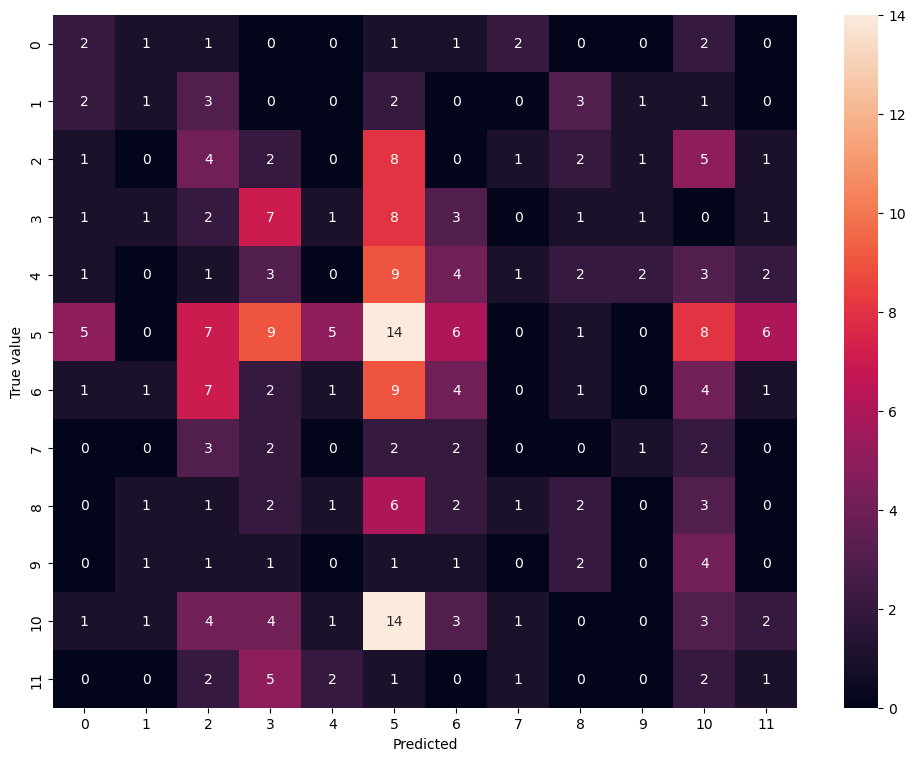

In [58]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,10) with 14 incorrect classifications represents depressive disorders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

In [ ]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html